# Практическая часть по ВКР
*ТЕМА «Разработка информационной системы для анализа активности пользователей интернет портала онлайн-образования»*

Выполнил студент:	**Еременко Артем Геннадьевич** <br><br>

<br><br>
**Описание работы:**

Перед нами стоит следующая задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет разработчикам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале следует оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее будет посчитана потенциальная нагрузка на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Будет разработана метрика успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. В последнюю очередь будет испробовано несколько моделей машинного обучения и оценены результаты их работы для выявления лучшего подхода.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Нам необходимо подготовить данные и описать их. Данные реальные и взяты с сайта Skillbox из курса "Data Science: Машинное обучение". <br>

Объединим датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создим для расчета среднего возраста студентов курсов. <br> <br>
Опишем данные: <br>
1. Посчитаем
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Построим горизонтальный bar-chart, отражающий количество студентов на каждом курсе. Значения отсортированы по возрастанию. Цвет столбцов содержит информацию о сфере, к которой относится курс. На график также нанесена линия медианы красного цвета.

3. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
import pandas as pd                      # подключаем библиотеку pandas для работы с таблицами
import numpy as np                       # подключаем библиотеку numpy для вычисления средних и медиан
import datetime                                  # подключаем библиотеку datetime для работы с датами
from dateutil.relativedelta import relativedelta # подключаем библиотеку relativedelta для расчёта разницы дат
import calendar                           # подключаем библиотеку calendar для перевода числовых значений дат в словесные      
from matplotlib import pyplot as plt     # подключаем библиотеку pyplot для построения графиков
import seaborn as sns                    # подключаем библиотеку seaborn для красивой визуализации bar-chart
import warnings
sns.color_palette("tab20")
warnings.filterwarnings('ignore')

In [2]:
'''
progress_phases[(progress_phases['progress_id']=='2b58f0616bd201662d0439dc7157c46a')]
progress_phases.at[2852, 'status']= progress_phases.iloc[2851]['status']

progress_phases.at[2852, 'finish_date']= '2019-07-11 23:59:18.828881+00'

progress_phases[(progress_phases['progress_id']=='2b58f0616bd201662d0439dc7157c46a')]'''

"\nprogress_phases[(progress_phases['progress_id']=='2b58f0616bd201662d0439dc7157c46a')]\nprogress_phases.at[2852, 'status']= progress_phases.iloc[2851]['status']\n\nprogress_phases.at[2852, 'finish_date']= '2019-07-11 23:59:18.828881+00'\n\nprogress_phases[(progress_phases['progress_id']=='2b58f0616bd201662d0439dc7157c46a')]"

In [3]:
#progress_phases.to_csv('Data/progress_phases.csv', index=False)

In [4]:
courses = pd.read_csv('Data/courses.csv', index_col=0)     # загружаем таблицу курсов
courses.rename({'id': 'course_id',\
                'title': 'course_title',\
                'field': 'course_field'},\
               axis=1, inplace=True)                       # переименовываем столбцы

course_contents = pd.read_csv('Data/course_contents.csv')  # загружаем таблицу содержимого курсов

progresses = pd.read_csv('Data/progresses.csv')            # загружаем соединительную таблицу прогресса прохождения курсов         
progresses.rename({'id': 'progress_id'},\
                  axis=1, inplace=True)                    # переименовываем столбец

progress_phases = pd.read_csv('Data/progress_phases.csv')  # загружаем таблицу прогресса прохождения курсов

whole_courses = pd.merge(courses,\
                         course_contents,\
                         on='course_id')                   # соединяем таблицы courses и course_contents по course_id

whole_progress = pd.merge(progress_phases,\
                          progresses,\
                          on='progress_id')                # соединяем таблицы progress_phases и progresses по progress_id

table = pd.merge(whole_progress,\
                 whole_courses,\
                 on=['course_id',\
                     'module_number',\
                     'lesson_number'])                     # соединяем таблицы whole_progress и whole_courses в общую таблицу

In [5]:
table[table.student_id == '768c2987a744c51ce64a5993a2a94eaf'].head()  # проверяем правильность соединения датасетов

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
526,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2237,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
2788,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [6]:
def get_age(birthday, today):
    # преобразуем строковый тип даты к типу  datetime.datetime
    birthday_strptime = datetime.datetime.strptime(birthday, "%Y-%m-%d")

    # вычисляем разницу времени между днём рождения и сегодняшней датой
    time_difference = relativedelta(today, birthday_strptime)

    # возвращаем возраст 

    return(time_difference.years)

1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      

In [31]:
courses_count = len(table['course_id'].unique())
print('Общее количество курсов: '+str(courses_count))

Общее количество курсов: 15


* количество модулей на каждом курсе, 
      

In [32]:
# группируем таблицу соответствия курсов списку модулей
df_modules = table[['course_title',\
                    'module_title']]\
             .groupby(['course_title'])['module_title']\
             .unique()\
             .to_frame()                                            
# создаём столбец для подсчёта количества модулей в курсе
df_modules['modules_count'] = 0                                     

# проходим по таблице и записываем размерности списков модулей
for i in range (0,df_modules['module_title'].size):
    df_modules['modules_count'][i] = df_modules['module_title'][i].size  
    
print('Количество модулей на каждом курсе:')
print(df_modules['modules_count'])

Количество модулей на каждом курсе:
course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: modules_count, dtype: int64


* количество уроков в каждом модуле на каждом курсе, 

In [33]:
 # группируем таблицу соответствия курсов и модулей списку уроков
df_lessons = table[['course_title',\
                    'module_title',\
                    'lesson_title']]\
                   .groupby(['course_title', 'module_title'])\
                   ['lesson_title']\
                   .unique()\
                   .to_frame()                     
# создаём столбец для подсчёта количества уроков в модуле
df_lessons['lessons_count'] = 0                     

# проходим по таблице и записываем размерности списков уроков
for i in range (0,df_lessons['lesson_title'].size):
    df_lessons['lessons_count'][i] = df_lessons['lesson_title'][i].size

df_lessons.drop(columns='lesson_title', inplace=True)

print('Количество уроков в каждом модуле на каждом курсе:')
print(df_lessons)

Количество уроков в каждом модуле на каждом курсе:
                                                                                  lessons_count
course_title                  module_title                                                     
Excel Базовый                  Визуализация данных Excel                                      5
                              Основной функционал Excel                                      11
                              Основной функционал Excel (продолжение)                         7
                              Сводные таблицы Excel                                           5
                              Формулы и функции Excel. Более сложные формулы                  5
...                                                                                         ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                               5
                              Требовательность digital-продюсера                     

* медианное количество уроков в модуле на каждом курсе, 
 

In [34]:
df_median = df_lessons.groupby(['course_title'])['lessons_count'].median()
print('Медианное количество уроков в модуле на каждом курсе:')
print(df_median)

Медианное количество уроков в модуле на каждом курсе:
course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lessons_count, dtype: float64


* количество учеников на каждом курсе

In [35]:
 # группируем таблицу соответствия курсов списку идентификаторов студентов
df_students = table[['course_title',\
                     'student_id']]\
                   .groupby(['course_title'])\
                    ['student_id'].\
                    unique().\
                    to_frame()                  
# создаём столбец для подсчёта количества студентов на курсе
df_students['students_count'] = 0                

# проходим по таблице и записываем размерности списков студентов
for i in range (0,df_students['student_id'].size):
    df_students['students_count'][i] = df_students['student_id'][i].size
# обновляем индекс
df_students.reset_index(drop=False, inplace=True)

print('Количество учеников на каждом курсе:')
print(df_students[['course_title', 'students_count']])

Количество учеников на каждом курсе:
                           course_title  students_count
0                         Excel Базовый             782
1                      Java-разработчик             763
2               Java-разработчик c нуля             581
3                     JavaScript с нуля             966
4   PHP-разработчик с 0 до PRO. Часть 1             854
5              SMM-маркетолог от А до Я             506
6                             UX-дизайн            1151
7                  Анимация интерфейсов             598
8        Веб-вёрстка для начинающих 2.0            2004
9                    Веб-дизайн PRO 2.0            1711
10                   Веб-дизайн Базовый             518
11                Веб-дизайн с нуля 2.0            2014
12                      Веб-разработчик             628
13        Интернет-маркетолог от Ingate            2168
14        Руководитель digital-проектов             685


* минимальный, максимальный, средний, медианный возраст студентов

In [36]:
students = pd.read_csv('Data/students.csv')     # загружаем таблицу с данными о студентах
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   43830 non-null  object
 1   id_                  43830 non-null  int64 
 2   city                 43830 non-null  object
 3   birthday             43830 non-null  object
 4   is_working           43830 non-null  bool  
 5   education            43830 non-null  int64 
 6   is_married           43830 non-null  bool  
 7   works_by_profession  43830 non-null  bool  
 8   has_children         43830 non-null  bool  
 9   work_places_cnt      43830 non-null  int64 
dtypes: bool(4), int64(3), object(3)
memory usage: 2.2+ MB


In [37]:
# вычисляем сегодняшнюю дату
today = datetime.date.today()                 
# вычисляем возраст каждого студента
students['age'] = [get_age(i, today) for i in students['birthday']]

In [38]:
print('Минимальный возраст: '+str(students['age'].min())+' лет')
print('Максимальный возраст: '+str(students['age'].max())+' лет')
print('Средний возраст: '+str(students['age'].mean())+' лет')
print('Медианный возраст: '+str(students['age'].median())+' лет')

Минимальный возраст: 18 лет
Максимальный возраст: 67 лет
Средний возраст: 34.39420488250057 лет
Медианный возраст: 34.0 лет


* минимальный, максимальный, средний, медианный возраст студентов на каждом курсе     

In [39]:
students

,id,id_,city,birthday,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
0,35e8a1938b9a33d5e45c8f4451c4309a,1325,Пограничный,1986-05-18,True,2,False,False,False,8,35
1,6c3e52be632fc50de9640147e4017dcd,7503,Москва,1984-02-01,True,3,False,True,True,5,38
2,2033122d7c9b24b36eebc468d5259642,8972,Кандалакша,1985-06-06,True,3,False,True,True,4,36
3,a6ae278c0eab719b3784e5ea147c128f,9235,Москва,1988-01-13,False,2,False,True,False,0,34
4,51b25c9afd20d178ef3c07276df38e2d,9588,Великий Новгород,1990-04-21,True,2,False,False,True,8,32
...,...,...,...,...,...,...,...,...,...,...,...
43825,a65ccacbe0226b345f195d02e676aa04,124251,Ессентуки,1984-12-28,True,2,False,True,False,3,37
43826,148f1375e4135e779053a0d4b2a63857,124338,Вена,1988-12-13,True,3,True,False,False,8,33
43827,05fa419f832fa78ad6e7a5f90b0f71e6,124363,Тернополь,1984-04-20,True,2,False,False,False,9,38
43828,9ff58c490f6ee5b013e7f62140ee3d79,124377,Рига,1987-11-04,True,3,False,True,False,4,34


In [40]:
# создаём столбец в датафрейме df_students для списков возрастов студентов каждого курса 
df_students['ages'] = np.empty((len(df_students), 0)).tolist()

# проходим по таблице студентов
for i in range(len(df_students['student_id'])):
    for j in range(len(df_students['student_id'][i])):
        # добавляем возраст каждого студента в список возрастов студентов на курсе
        df_students['ages'][i].append(students[students['id']==df_students['student_id'][i][j]]['age'].values[0])    

In [41]:
# проходим удаляем из столбца возрастов отсутствующие значения
for i in range(len(df_students)):
    df_students['ages'][i] = [x for x in df_students['ages'][i] if str(x) != 'nan']  

In [42]:
# создаём столбец в датафрейме df_students для минимального возраста студентов каждого курса 
df_students['min_age'] = float('NaN')

# создаём столбец в датафрейме df_students для максимального возраста студентов каждого курса 
df_students['max_age'] = float('NaN')

# создаём столбец в датафрейме df_students для среднего возраста студентов каждого курса 
df_students['mean_age'] = float('NaN')

# создаём столбец в датафрейме df_students для медианного возраста студентов каждого курса 
df_students['median_age'] = float('NaN')

# вычисляем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
for i in range(len(df_students)):
    df_students['min_age'][i] = min(df_students['ages'][i])
    df_students['max_age'][i] = max(df_students['ages'][i])
    df_students['mean_age'][i] = np.mean(df_students['ages'][i])
    df_students['median_age'][i] = np.median(df_students['ages'][i])

In [43]:
df_students.drop(columns=['students_count','student_id','ages'])

,course_title,min_age,max_age,mean_age,median_age
0,Excel Базовый,21.0,48.0,25.462916,25.0
1,Java-разработчик,27.0,52.0,39.757536,39.0
2,Java-разработчик c нуля,30.0,62.0,45.507745,45.0
3,JavaScript с нуля,24.0,48.0,35.715321,36.0
4,PHP-разработчик с 0 до PRO. Часть 1,21.0,56.0,36.373536,36.0
5,SMM-маркетолог от А до Я,24.0,55.0,35.492095,35.0
6,UX-дизайн,22.0,45.0,29.922676,30.0
7,Анимация интерфейсов,22.0,47.0,29.767559,29.0
8,Веб-вёрстка для начинающих 2.0,22.0,49.0,34.070858,34.0
9,Веб-дизайн PRO 2.0,18.0,51.0,32.727060,33.0


2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы


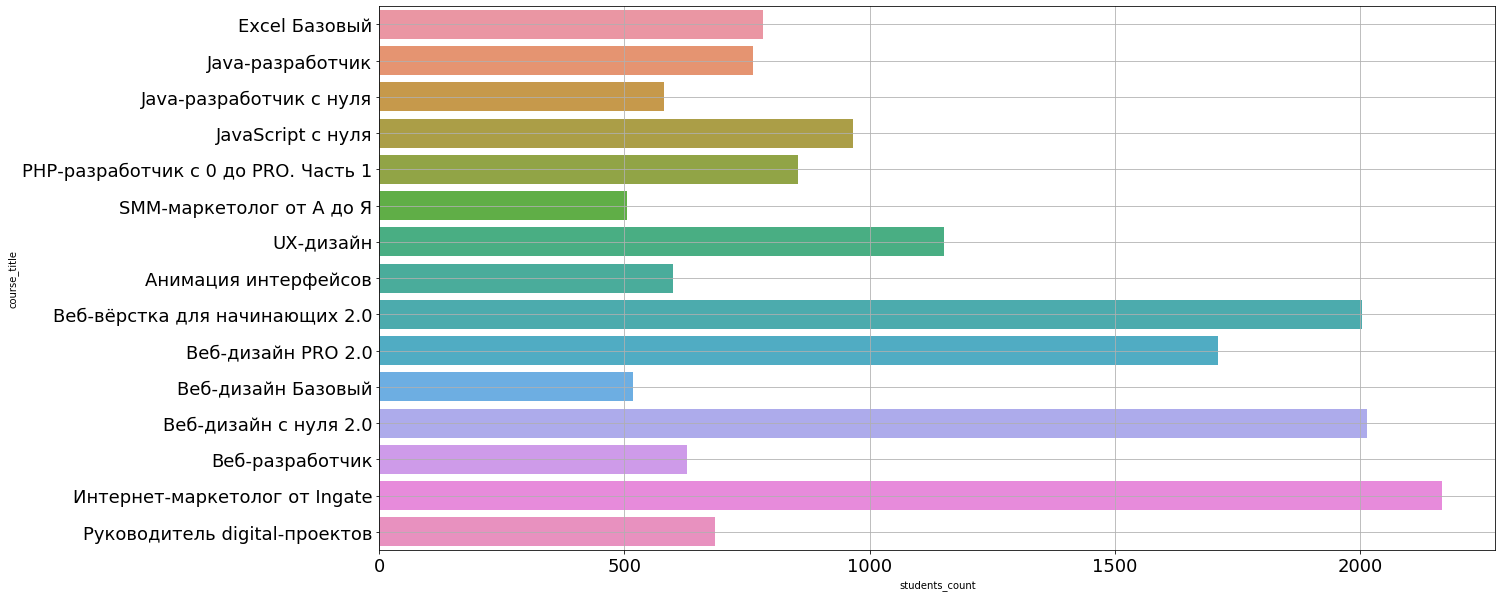

In [44]:
# задаём размер диаграммы
plt.figure(figsize=(20,10))
# задаём размер шрифта отметок на осях
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# задаём данные для построения bar-chart диаграммы
sns.barplot(data=df_students, y="course_title", x="students_count")
# деляем разметку видимой
plt.grid(visible=True)
# отрисовываем диаграмму
plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

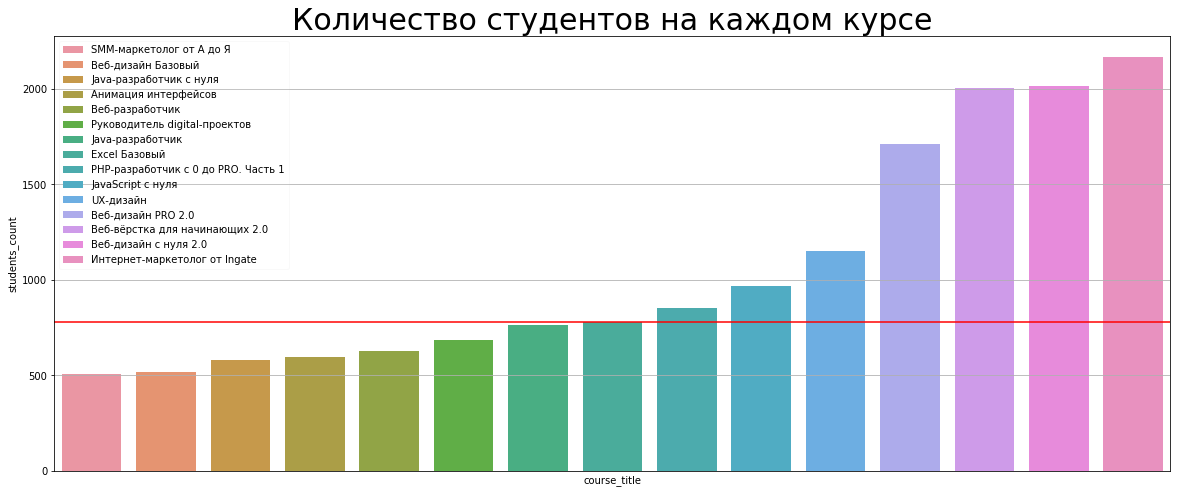

In [45]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize=(20, 8))
# задаём данные для построения bar-chart диаграммы
ax = sns.barplot(data=df_students.sort_values(by='students_count'),\
                 x='course_title',\
                 y='students_count',\
                 hue='course_title',\
                 dodge=False)
# задаём заголовок диаграммы
plt.title('Количество студентов на каждом курсе', fontsize=30)

# строим медиану
median_students_count = df_students['students_count'].median()
ax.axhline(median_students_count, color='r')
# отключаем отображение рамок
#ax.axis('off')
plt.box(True)
# задаём легенду
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=labs, framealpha=0.1, loc='upper left', fontsize=10)
plt.grid(True)
plt.xticks([])
# отрисовываем диаграмму
plt.show()



4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

`courses_count` - количество уникальных идентификаторов курсов, оно же и есть количество курсов <br>

`df_modules` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_title` – название курса в качестве идентификатора <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_title` – массив названий всех модулей курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `modules_count` – количество модулей в курсе <br> <br><br>
`df_lessons` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_title` – название курса в качестве 1-ого идентификатора <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_title` – название модуля в качестве 2-ого идентификатора <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lessons_count` – количество уроков в модуле <br> <br><br>
`df_median` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_title` – название курса в качестве идентификатора <br>
&nbsp;&nbsp;&nbsp;&nbsp; значения - медианное количество уроков в модуле на каждом курсе <br>
<br><br>
В таблицу `students` были добавлены следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;  `age` – вычисленный возраст студента типа float <br>
<br><br>
`df_students` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – массив идентификаторов студентов курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `students_count` – количество студентов на курсе <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `ages` – массив возрастов студентов курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `min_age` – минимальный возраст среди студентов курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `max_age` – максимальный возраст среди студентов курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `mean_age` – средний возраст среди студентов курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `median_age` – медианный возраст среди студентов курса <br>
<br><br>
`median_students_count` – медиана количества студентов <br>
<br><br>

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [46]:
# создаём датафрейм, в котором собрали id всех студентов по каждому курсу 
# и в который будем производить дальнейшие записи
df_growth = table[['course_title', 'course_id', 'student_id']]\
            .groupby(['course_title', 'course_id'])['student_id']\
            .unique()\
            .to_frame()\
            .reset_index()  

In [47]:
df_growth

,course_title,course_id,student_id
0,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,"[2364226ef29a6afef154dc8f5cef203d, c8620d7c866..."
1,Java-разработчик,6e4837f0a65c68efbfdd0594d6774701,"[fb019632313c642191d5a072499ad647, 525cd8878b2..."
2,Java-разработчик c нуля,943306102e5b067d08a29094f37b8193,"[9f5b2a1edcb6a434bf165fb26053c346, 6303921b52b..."
3,JavaScript с нуля,e9bb9205eeed307ee7cbaa08bfd166c3,"[19fcf882b59afea4bee9dd9da595eaee, db6e0aab276..."
4,PHP-разработчик с 0 до PRO. Часть 1,ccbab00e99b27f83369d6cc89d914ad6,"[25e0e7bb7c64ef5858e17b789b05ca11, 907c75f012b..."
5,SMM-маркетолог от А до Я,842218e7c983795934bbe4533c0888c8,"[513679f4bc954e187f2114e6d63fa369, 000333b6aa5..."
6,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,"[19fcf882b59afea4bee9dd9da595eaee, 84d2010cc19..."
7,Анимация интерфейсов,04ba6d0b40670c43a209141fa01fa784,"[5c133b73eecb3743a4caa59820d3bd6b, 3dac07629e8..."
8,Веб-вёрстка для начинающих 2.0,abce125a877c2196a3bc7bfbc11b5fc5,"[25c266e1291ae89e5b1d75867648b9cd, c89efa49dd1..."
9,Веб-дизайн PRO 2.0,c9fcb746d51e41bc5a217002d081454b,"[768c2987a744c51ce64a5993a2a94eaf, 03151bc73bd..."


In [48]:
# создаём пустой список, в который будем записывать списки
# с датами начала первой домашней работы по каждому курсу
dates_list = []
for i in df_growth['course_id']:
    print(i)
    for j in df_growth[df_growth['course_id']==i]['student_id']:
        print(j)
        buf_list = []
        for k in j:
            try:
                buf_list.append(np.nanmin(table[(table['course_id']==i)&\
                                                (table['is_homework']==True)&\
                                                (table['student_id']==k)]['start_date']))
            except ValueError:
                continue
        dates_list.append(buf_list) 

ac634845fb0350d0e9d49078aaa4b68f
['2364226ef29a6afef154dc8f5cef203d' 'c8620d7c8669b9ce5514b7e22b421f66'
 'de4d367fb54ae3b088bcd5d757fdd95f' '27a4affbd4faad18f7d108f8ff719dbb'
 '35a96a3a2e6a0e4eef24fbd6786580c7' 'c0ae4f03fab0ac3249190e808fcc2c66'
 '179264fa25fc38115db53cf318d7b818' '7e477938917aa8e5cf36ae703624c8c4'
 '0098ca12f73a56dadbf6099389305d80' 'd31d25a7597ff20936a4364919bd5eb5'
 'c91b27546a188a436553908b7b3c4853' '1b5b44680339b9b264193d2f3be5894c'
 '103ddc71f34e6c1505224f4cff7691b1' 'eacd46942e86d5d364c0b62a03322c18'
 'bcacd0ef21432c1748c230a216715b42' '7d70c6bebd6977636f32b369e0551e37'
 '26f460783532cf2f12ad63456392171e' '6cfe083383f3d5b55ce8d42aec6db801'
 'aa426484e70659afe6b9b2ee5138c911' 'ee5ca6e70488b110cdaa555b364a35c6'
 '8923bfe03f0c6ef18d90da3af183e306' '97a6238a143b91fe317fd0c704712e54'
 'a0f1e364365d96e1ff35a4666afc2ed0' '1d12f0d468e75ef82b5ec318149619e3'
 'c3cd81fd81b309e6820395e7a2eb5d6c' '546b94be92059eea15e2533a0deda275'
 'fa80f53f0de7c6a7232be75666b03304' '29ef8d9

6e4837f0a65c68efbfdd0594d6774701
['fb019632313c642191d5a072499ad647' '525cd8878b223bb47b65d08c3701c14e'
 'b4ce142e3f18f6cb9f1ccc93caf3e16a' '93a2fa37790bbc5e648123766c55ae87'
 '4213bd9b20ecfa56a11b840b1497c9cf' 'ef3c8c2f27f576c69a97d1ef3cd4e66e'
 '675ec875f6f8dafc90038f85246d4a61' 'd3b610427cbf0a556bb7780ad830b01a'
 '419b2c715e1e2ff59bf7f5858936f50e' '9c8975be2c86036a53075bc2ebc32bfc'
 'c4941d9796bdd6daf8e52fb4e073a5e3' '7824668950cd7c129b69861220dbffb9'
 'bb8d65147c3b8aadf98f4c38b285f2a8' '589babb8cca8f423963ae846f71d61e3'
 '6787a3e1a617f1068239ccf6f9a95860' '49932fb7aa4005110d95e047cbd5833b'
 '49f9898b28fd43b448d790e8e6b95b16' 'adfb8de7ac5ebbe579738038416bd595'
 '5e70a4af306698df847cf8c37a9af2a5' '10b0c1408bc0d73c7920a7a64ca2d4db'
 'c5d750196104a878e226035d67213ebc' '3c7cbeafcdf4e1175e03be9935612a18'
 '3c3e5eaaf0e53be81b7d897b9ae21997' '3e66c0e62abc8f3446b447dcd3bb3e8b'
 '1caeaf1659e1a70b4a00e9a38786d74d' 'ba4ffeeba0fcdf80152342c4491a98a1'
 '413590c881203dcbc48162e73ad0fcf8' '2e9ad68

943306102e5b067d08a29094f37b8193
['9f5b2a1edcb6a434bf165fb26053c346' '6303921b52b779bb223cd5e578bcb68f'
 '645e6de703f36a001242dad5040f9a94' 'c9ebd8f94176e20be39114173a1f62be'
 'b076dedd2ca8adeadf1170fde6c48c3e' 'b7840b99586f452fd85e32f75d86270b'
 'd26fc50fa8cea6d3d5b35616d4855538' '872cfccc5c2c1333f88024afac11c04e'
 '19012861b82ec7c3065ec11124f669e0' 'c8fa9366dfc5ba1b09a591644da8ba5f'
 '48c10cf9ff176b4a8b6a1a58ada95ee4' '232ba897b7b1a6b9cb74629daa7c2d4d'
 '88fdd8deb4a35b317fbbbe1c6bb30b5f' '8f9ea85f1cf22adb666d7019b3147551'
 '8aa33a2a90dc7b03bfa08b74345014e2' '1939e2d828f831cbbe578be1db1c6d55'
 'e70a3d1bac02d2c7972b8f9573d9e2c9' 'c8a1d8b9d71cab67389d7199d623f574'
 '92a8ca9f50e2e63745cd3e406a5f259d' '75bd803914926345b2a0681133f9ef96'
 '0ba5e61ea012b0eddc9f88df22b4fcad' 'c8a36273396d50d59e3ec84785d8a594'
 '32a53747ce2f34ea33a153205fa62ae9' '08ce9b07fb92e0f178013b042107ed26'
 '0565651d654e647e36fb474eae15cb4e' '76aaaabc337e12dc06ffa43bdefe1036'
 'd918bff66a30e636dcadfd947e5914a3' '74ac63d

e9bb9205eeed307ee7cbaa08bfd166c3
['19fcf882b59afea4bee9dd9da595eaee' 'db6e0aab2760f95302879a035c4ce8f5'
 '1921661f1b141a20170138bc94828581' '0878a62648a48b17b6b9c6cee00e87a2'
 '4430aac4c96cbd54453328e6e77eabcf' '600f6aed7f45983983c234ea28318b14'
 'ab4c1d250e5a199e88a4ed2a3f0fcd42' 'e744121627de67a3553ffeaa38a74371'
 '7c66c3a8dab39f8e1014cc66b25e7c33' '8292e400223e125234ef2e905631c994'
 '811383521b6c8b5703250da576f284f2' 'b1e8f6195e2252318d51d66e8ae2b961'
 'b404bcb53611c4e1d4757ec6dc7bbf20' 'e23a044f2c842eddd7a52d2228c7f012'
 'f9d4d0165ef88fbec16c1fd282e77842' '04e037d433eead7437a8ee959b3937b2'
 'e2c9b8243d8f7224cf9783fa455f0276' '160a0fb849e350888271c78d989f8c90'
 'eae1513e11aba2d84695b0f554304824' '457f79b340d3bb47441f6038d5af6f7b'
 'b5acf52ede3f2b38b303807ceae3666a' '1ba4773332837b8fb3f4f82f26949d17'
 'b88132add8f4aa3693e49d404db4cc14' '134106083469dfd954924be9af60c923'
 '4b44ad0ab9bb5fd7334dac8915326afa' '63c9237fea9acec4fe2208fee01d52b9'
 '8101a2515cb58f3b273af307c2fc251e' '4bf887b

ccbab00e99b27f83369d6cc89d914ad6
['25e0e7bb7c64ef5858e17b789b05ca11' '907c75f012b97c7ba7eba4873d441a66'
 '21a51a92e9c8e09e5e47b8729464e396' 'bac48238a13670ade2fb3c13efd208a1'
 '09ecd4840be505bac40b878a47e59b21' 'dd7e34450088f16504b90294454b5a8a'
 '1afbf3c4f650a7eda053ef74c6c02e87' 'e1efc83ccf1787d7af5379912c9b6a3b'
 'e12f886545b452d04871ac92f54fa16e' '5a930bfcc919de812f8718f9adaf65f4'
 '04e037d433eead7437a8ee959b3937b2' '1383d0e6fbe20bc492a89a4f6d2aa1c5'
 'd4f9669403a90289adb3025ff445b720' 'af2857f1856c87b6ec732684d69eaeea'
 'd1d83ee02ff0a21416e50d78a815dffb' 'b3626d8eaad37a7405ef21a5f5e02df8'
 '311e6c5df8cc6a51bb38c95355ef240e' 'e226d0a8cdcd7d2895c7a1b4625f3c11'
 'efe403cae1d8a9b7c4a665788914d3e0' 'c6d0387fe218b906105d51d8f423ce4b'
 'a27ca0941d0f87452d9e859145aa299b' 'fb3bc267e41423a15ef97f7666e18721'
 '4ba8bbde2ab4902a70d909ce01d885e0' '3da1fa346faea5b8ae50788a72262d53'
 '2653049efab3ee7b55485a5830ee6e71' 'a8a40c9b47d73a18428067aa05dfdf8b'
 '468dbe06cd1a4ebb9e7c27ef6b8f5329' 'fc30c34

842218e7c983795934bbe4533c0888c8
['513679f4bc954e187f2114e6d63fa369' '000333b6aa5706c53f4d2ec24c7a128d'
 'aaad3a44731f2e89ab89945136b91a3c' 'cda59a5a06532075ec98ce2a3f0c5993'
 '9aa6cc528c65fb71589cce0ea64d121b' '095017a60ec3d6c94699c03927b10c25'
 'f7850d82f26832da09a6fb3aedf816a0' '0d7e21b7e7fd96403796a8dae0b5e1b4'
 '5216c383b49ccd4c8f72e3aa507f755e' '97d3a5c53a800f576ac92e3f277afd29'
 'fae12470a010bc556c4c881f0ae835da' 'db02369e30e46927d0536788c105570c'
 '1c6e86934e3c0eabece45d2440b5218a' '173f34e481891c233bae80fbd32256c1'
 '5569aea90f7dc37154564ba5927f88fd' '754e9db67ffb0074f7987728c78924df'
 'ef4bad7cfa4ea3d614934cb531442c8c' 'e91e04c8ddb1da3aa75e6ec6132ef913'
 '1633763f00304f8a18eddbbf366a350e' 'ff5837c1afb17ad4b11bc9f87478a4eb'
 '82a8997e9fd5261574ef730d5e7d9357' '10b2ce948b690127e48c99aedad3e7a8'
 'fad241dabbb3bb6820ef2a3c7bde1e97' '494cbb7837999dada182ce1cee037288'
 '2ac5f50d9cf4b7a998779c26f2f83410' '82a5a0466184a32867045a6359126cb8'
 'c1c2716c9f9ee5773d68303c2a66f1ae' 'ee0b559

dad6f6ffc086caa89e2f40c28a9c7490
['19fcf882b59afea4bee9dd9da595eaee' '84d2010cc192eb3b4d73477cca78845b'
 'd043fa32f0388fc0ce8472d1d29e3876' ... '8197f2b3695fe54b9dedc6d56fdd0db9'
 '3bba1364ea2e201e34d0d72ef0f6846e' '0582f0e6b95b9178061779ce56d4279e']
04ba6d0b40670c43a209141fa01fa784
['5c133b73eecb3743a4caa59820d3bd6b' '3dac07629e8e0b23af6654f6deda91c4'
 'b3c656269aeecf3a08f21d0df3574eca' 'af74a2b9b1eee0228d6de03c9be2d440'
 'd3687c1d9beb51f8ebc7f7b2b595c8b4' '8030580b0bb7568f7844f46bde954e6f'
 '125f9c1b4b5da2e62f8d21b0a2f1fbaf' '31d387df0320a7de46fb41fd4b251b37'
 '7f55b8fa7a0640d86d2b0dff8e4d723a' '721337840a7051194e68da4445c4eec7'
 '3acda6c1527ff0aaf3946010c6c01660' '8a1c831afcb7368b64af6abc8e9ca250'
 '89988d95304df3215a2dd21866124e33' '5eb4b4867169c9efa5d9af3bd668e774'
 'cea198968976f0b8f2a6312d67a45e1c' 'd9cd9911ba530356dce1c5a3984230ac'
 '667699afb746a72756657f61066c8b09' '382fe7e46747d3a1d01397b1e688ec00'
 'af1e4542565c731e3ece3a65890ef672' '0ae0b21f2192cc4cec514079323fe20a'
 '915d

abce125a877c2196a3bc7bfbc11b5fc5
['25c266e1291ae89e5b1d75867648b9cd' 'c89efa49dd107f2b062b072f09ec9161'
 '806cd0c5cf641c22d2d429418ff7f82f' ... '16b806a57020a94e88c1cf1c53f36039'
 'cde0716ec3486e864f3c47b05f938277' '73c4d352e7fef3e8bad7e13faec0c82d']
c9fcb746d51e41bc5a217002d081454b
['768c2987a744c51ce64a5993a2a94eaf' '03151bc73bdb29fe1be1443c6d83e22f'
 'ed235f47e16da6e83d3f1cb511f38ea6' ... '9828a1fd36a680ee8e8528f141b2a5cf'
 'b9ef8e1d37dfb03bc33df1a71c32ac79' '31940e155add55af4c07b759230b646a']
17013cd19d25cb3f28dc1b2683721bb9
['221d1a839570cda580c9171a270d485d' '7b427cf5031b3aabe7957d3e0dd7bd57'
 '12e8d4153463f7f986697efca161c332' '01ab08f9a92950c8515629091ef5e109'
 '125f9c1b4b5da2e62f8d21b0a2f1fbaf' 'c0c50ad8c0d2261b962b326d3c89a1f2'
 'cab603a2087ba3ead3a0482cf9a48cf1' 'a50b11f0ae8b5ad66c7d3c97f348e422'
 'ba241e206bec4b499e706b54e351a900' 'a718805375d21000b94469da397c327d'
 '8c83d6ea61ef953c42b409f28e97451f' '18118a8c74aef04001f2a3ec8d2c6120'
 'aab6c3ca3ab430009e7b0aea36498521' 'af

e3a0df907589d56692b5cb561fd90d87
['fcd7b6853c2582372980dd6af56d3bdc' 'e281add808e6839a167769039836c78f'
 '8079c4fefaa9e5cd4bc6485778d2140c' ... 'e74e80715ab81aee5a774a5bd8e450d1'
 '343786907ce5cfd09d598d276b484036' 'e67c917ccbc27bdd6eb9027fd96f66ed']
480d25ad36878fce09e7aada316ba1a6
['5b1edc400475db41233883e897483888' '25c266e1291ae89e5b1d75867648b9cd'
 'e1e4d12fc6e4b308690d4166112be19b' '51cf5a145b2cbce6d8d47ff33735b9c7'
 '1e5f10a45870f49011c071aee84c8b4a' '22b3d036bd5747b21d97d277e6702fec'
 'f57e9fa4ecbe7d83694ff5a6c65a568f' '457f79b340d3bb47441f6038d5af6f7b'
 'd374675b9840f312264adc970cbc951f' '70ac65ea132f4d440a3bc6a4dc34125b'
 '037d4fd8631e6b386f3ac94cf78adbab' '0082e6e7a5674d7c9ec466c380fef574'
 '4e46c8db4596619aba7aec907c2c8330' 'de9638fe3057c1f99d56ce680c811177'
 'dbb7f9c46907170a932cc830b56d7242' '45e37cf93b6f07455b101e6ad39420e8'
 '0beb43bfe6737a7fc1020969f066f59d' '8c805a0e1b308ae231b2d7c7aa7956e2'
 'a248f4afa44461a2a5a90b5ce23f7685' '178404593d902b5dddce67f2022581f9'
 '47f5

bf27a4bf4ada4c756451703ea62a914f
['f69e2707b7ba94d49ca03ea9ed52ea5d' '10f2e30b5b3fc58795df75e3623e3a52'
 'a0f7e139d47327cd91579fe2aaf098a7' ... '1ee634f617e3232d917959663c208afd'
 'e9391a5058e946604efd95126634ec32' 'ae9c90a17256a2f69d4404af7d2df81f']
0770b1b039964228294f1f34b29fc2c1
['c8ce8ad31f42723fb77d1da2f28610db' '8cc1db26258ce7afab05546c902bd2b9'
 '841e163f7898c70a581197cc5dec861f' 'c8fa41e3b4bf23cfc336bd17e2c0e2aa'
 '3774d193334acf2cfde9c2d89b468e1e' '1c660adcdc717880ff5513c4a5163cd2'
 'aa459a176eeec16a1ff61f594cb0c214' '5b2bbd6e5d02c815685cc520c1a04dd2'
 '215dd85c5fe914141ddb153b46ff12b2' '34dcf5ecaa3e5800893d3a19e4724817'
 '134161c2f212c05e4760e8378b21cc80' 'e812e1159e2cf0a70262d572c521354e'
 'c0f8b0c70765a109b03ba344e5583ea7' 'ab4344f77fc87261a5b7f98674a3a072'
 '56e1ed07068c67341c692a6d71d5b0bc' '478e69a7ddca8abe5460504868c745a0'
 'd6a8850e165a99a9b083100d34f94e13' 'b5f4bc781eab9647e577f54a84e2f565'
 'eda357f91a627a6fb0c784b588e06a6e' 'ad81dd472b89547bb29de2b50fc5f730'
 '0b19

In [49]:
# записываем все даты в датафрейм 
df_growth['dates'] = dates_list

# выделяем из дат год и месяц и записываем всё в датафрэйм 
df_growth['months'] = ''
for i in range(len(df_growth)):
    df_growth['months'][i]=[x[0:7] for x in df_growth.iloc[i]['dates']]

# создаём список из месяцов в диапазоне от марта 2016 до июля 2019 включительно
list_of_dates = [x[0:7] for x in np.datetime_as_string(pd.date_range('2016-03', '2019-08', freq='M').values)]

# высчитываем прирост студентов на каждом курсе в каждом месяце
for i in list_of_dates:
    list_of_counts = []
    for j in df_growth.index:
        list_of_counts.append(df_growth['months'][j].count(i))
    df_growth[i] = list_of_counts

In [50]:
df_growth

,course_title,course_id,student_id,dates,months,2016-03,2016-04,2016-05,2016-06,2016-07,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,"[2364226ef29a6afef154dc8f5cef203d, c8620d7c866...","[2018-12-10 16:15:15.891656+00, 2019-05-01 18:...","[2018-12, 2019-05, 2018-11, 2019-04, 2018-08, ...",0,0,0,0,0,...,30,33,43,52,46,63,46,45,43,28
1,Java-разработчик,6e4837f0a65c68efbfdd0594d6774701,"[fb019632313c642191d5a072499ad647, 525cd8878b2...","[2018-07-16 18:24:26.22924+00, 2018-05-06 10:4...","[2018-07, 2018-05, 2018-11, 2019-01, 2019-01, ...",0,0,0,0,0,...,33,32,102,75,50,74,7,4,5,2
2,Java-разработчик c нуля,943306102e5b067d08a29094f37b8193,"[9f5b2a1edcb6a434bf165fb26053c346, 6303921b52b...","[2019-07-15 13:56:59.859533+00, 2019-06-17 17:...","[2019-07, 2019-06, 2019-04, 2019-06, 2019-05, ...",0,0,0,0,0,...,0,0,0,0,0,74,109,74,98,63
3,JavaScript с нуля,e9bb9205eeed307ee7cbaa08bfd166c3,"[19fcf882b59afea4bee9dd9da595eaee, db6e0aab276...","[2018-12-09 11:00:34.246613+00, 2018-06-08 18:...","[2018-12, 2018-06, 2019-06, 2019-01, 2019-04, ...",0,0,0,0,0,...,42,36,37,57,42,57,49,51,34,21
4,PHP-разработчик с 0 до PRO. Часть 1,ccbab00e99b27f83369d6cc89d914ad6,"[25e0e7bb7c64ef5858e17b789b05ca11, 907c75f012b...","[2018-06-18 20:15:53.579738+00, 2018-05-31 12:...","[2018-06, 2018-05, 2018-12, 2018-12, 2018-10, ...",0,0,0,0,0,...,31,27,35,35,23,38,32,31,29,15
5,SMM-маркетолог от А до Я,842218e7c983795934bbe4533c0888c8,"[513679f4bc954e187f2114e6d63fa369, 000333b6aa5...","[2019-04-15 09:33:50.708072+00, 2019-05-31 15:...","[2019-04, 2019-05, 2019-03, 2019-05, 2019-03, ...",0,0,0,0,0,...,27,13,27,42,41,42,55,56,67,46
6,UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,"[19fcf882b59afea4bee9dd9da595eaee, 84d2010cc19...","[2019-02-26 15:18:47.304803+00, 2018-11-25 19:...","[2019-02, 2018-11, 2019-02, 2018-02, 2019-01, ...",0,0,0,0,0,...,36,43,47,68,34,39,20,26,48,18
7,Анимация интерфейсов,04ba6d0b40670c43a209141fa01fa784,"[5c133b73eecb3743a4caa59820d3bd6b, 3dac07629e8...","[2018-07-07 10:13:37.089749+00, 2019-01-16 18:...","[2018-07, 2019-01, 2018-09, 2018-09, 2019-02, ...",0,0,0,0,0,...,27,14,22,34,17,14,11,10,14,7
8,Веб-вёрстка для начинающих 2.0,abce125a877c2196a3bc7bfbc11b5fc5,"[25c266e1291ae89e5b1d75867648b9cd, c89efa49dd1...","[2018-08-08 22:10:41.417582+00, 2018-10-06 10:...","[2018-08, 2018-10, 2019-06, 2019-05, 2019-07, ...",0,0,0,0,0,...,78,81,132,119,83,106,91,82,89,72
9,Веб-дизайн PRO 2.0,c9fcb746d51e41bc5a217002d081454b,"[768c2987a744c51ce64a5993a2a94eaf, 03151bc73bd...","[2018-06-21 19:10:36.957891+00, 2019-03-16 15:...","[2018-06, 2019-03, 2019-07, 2018-07, 2019-04, ...",0,0,0,0,0,...,27,28,43,59,57,69,56,60,47,40


2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

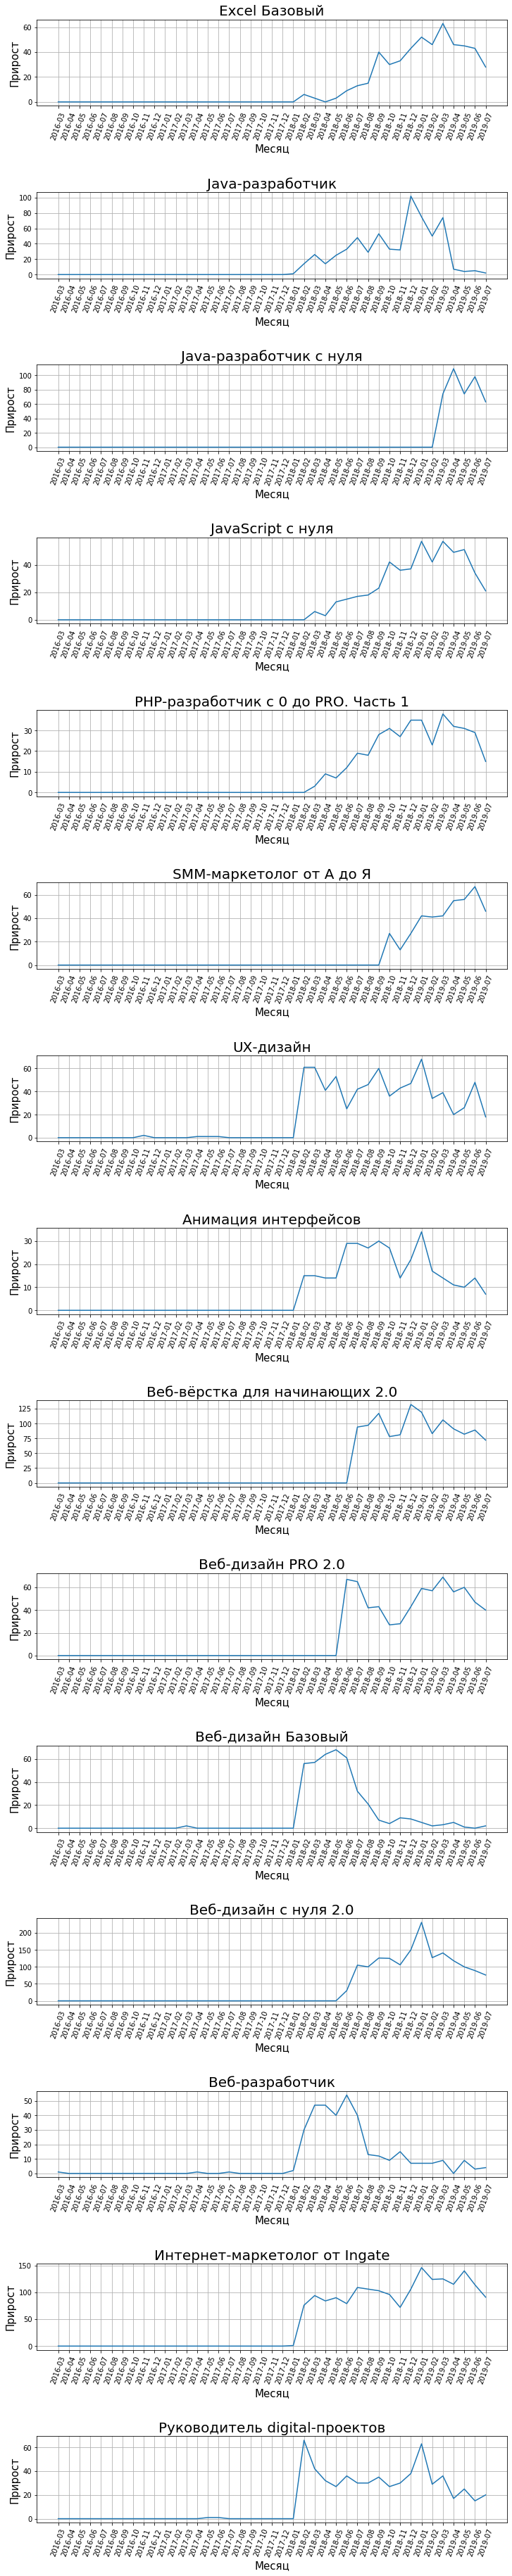

In [51]:
n = len(df_growth)

# задаём размер диаграмм
fig, axes = plt.subplots(n, 1, figsize=(10,50))
fig.tight_layout()
plt.subplots_adjust(hspace=1)

for row in range(n):

    attr = df_growth.iloc[row]['course_title']

    x = list_of_dates
    y = df_growth.iloc[row][list_of_dates]

    axes[row].plot(x, y)

    axes[row].grid(True)
    axes[row].set_title(attr, fontsize=20)
    axes[row].set_xticklabels(list_of_dates,rotation=70)
    axes[row].set_xlabel('Месяц', fontsize=15)
    axes[row].set_ylabel('Прирост', fontsize=15)
    
    

plt.show() 

3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

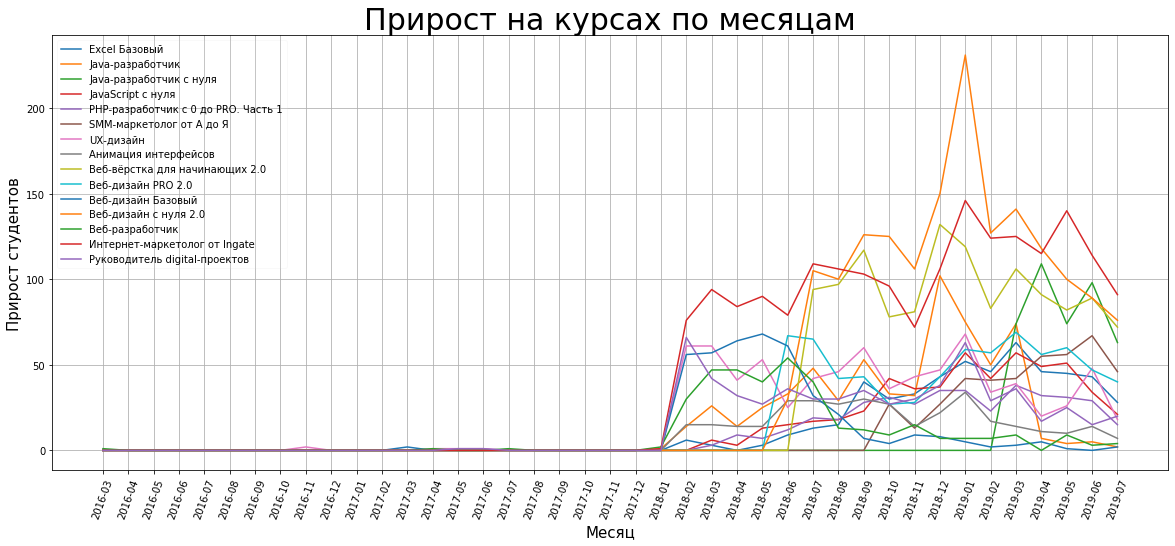

In [52]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize=(20, 8))
for row in range(courses_count):
    # задаём данные для построения line-graph 
    ax = sns.lineplot(x=df_growth[list_of_dates].columns,\
                     y=df_growth[list_of_dates].iloc[row].values)
    # задаём заголовок диаграммы
    plt.title('Прирост на курсах по месяцам', fontsize=30)
    # задаём названия меткам
    ax.set_xticklabels(list_of_dates,rotation=70)
    ax.grid(True)
    # задаём легенду
    plt.legend(labels=df_growth['course_title'], framealpha=0.1, loc='best', fontsize=10)
    # задаём название осям
    ax.set_xlabel('Месяц', fontsize=15)
    ax.set_ylabel('Прирост студентов', fontsize=15)

plt.show()



4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [53]:
# создаём датафрейм, в котором собрали id всех прогрессов и даты их выполнения по каждому курсу 
df_progress = table[(table['is_homework']==True)&\
               (table['status']=='done')][['course_title',\
                                           'progress_id',\
                                           'start_date',\
                                           'finish_date']]
df_progress

,course_title,progress_id,start_date,finish_date
3555,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00
3556,Веб-дизайн PRO 2.0,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00
3557,Веб-дизайн PRO 2.0,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00
3558,Веб-дизайн PRO 2.0,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00
3559,Веб-дизайн PRO 2.0,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00
...,...,...,...,...
350655,Java-разработчик c нуля,45289b36f4827d49d9d3757fc9486ca0,2019-06-30 12:24:44.841887+00,2019-07-01 05:11:00.227931+00
350656,Java-разработчик c нуля,7c46c781a54bf9d17f24b4920df4f7eb,2019-06-29 11:22:10.230328+00,2019-07-02 20:09:44.150192+00
350657,Java-разработчик c нуля,56a9cb904c20cd2fcfa8104f87f988a7,2019-07-03 05:03:29.121944+00,2019-07-04 07:53:36.550522+00
350670,Java-разработчик c нуля,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00


In [54]:
# находим месяцы, в которых был сделан прогресс
df_progress['progress_months'] = [list(pd.period_range(df_progress['start_date'].iloc[x],\
                                                       df_progress['finish_date'].iloc[x], freq='M')\
                                       .to_series().astype(str).values) for x in range(len(df_progress))]

df_progress.reset_index(inplace=True, drop=True)

# далее считаем каждый месяц прогресса как 1 
true_false_df = [[[(k==i) for k in j] for j in df_progress['progress_months']] for i in list_of_dates]
counted_df =[[sum(j) for j in i] for i in true_false_df]
k = 0
for i in list_of_dates:
    df_progress[i] = counted_df[k]
    k+=1

In [55]:
df_progress

,course_title,progress_id,start_date,finish_date,progress_months,2016-03,2016-04,2016-05,2016-06,2016-07,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,[2018-06],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Веб-дизайн PRO 2.0,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,[2019-03],0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Веб-дизайн PRO 2.0,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,[2019-07],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Веб-дизайн PRO 2.0,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,[2018-07],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Веб-дизайн PRO 2.0,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,[2019-04],0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,Java-разработчик c нуля,45289b36f4827d49d9d3757fc9486ca0,2019-06-30 12:24:44.841887+00,2019-07-01 05:11:00.227931+00,"[2019-06, 2019-07]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
44922,Java-разработчик c нуля,7c46c781a54bf9d17f24b4920df4f7eb,2019-06-29 11:22:10.230328+00,2019-07-02 20:09:44.150192+00,"[2019-06, 2019-07]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
44923,Java-разработчик c нуля,56a9cb904c20cd2fcfa8104f87f988a7,2019-07-03 05:03:29.121944+00,2019-07-04 07:53:36.550522+00,[2019-07],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44924,Java-разработчик c нуля,f6216204f2c65eea37f913cfa5e4eb6a,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00,[2019-07],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# высчитываем количество прогрессов в каждом курсе
df_progress_task_1 = df_progress.drop(columns=['progress_id',\
                                   'start_date',\
                                   'finish_date',\
                                   'progress_months']).groupby('course_title')[list_of_dates].sum().reset_index()
df_progress_task_1

,course_title,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,Excel Базовый,0,0,0,0,0,0,0,0,0,...,235,224,227,311,327,340,305,289,246,157
1,Java-разработчик,0,0,0,0,0,0,0,0,0,...,240,226,377,449,427,469,261,171,102,36
2,Java-разработчик c нуля,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,87,477,637,924,616
3,JavaScript с нуля,0,0,0,0,0,0,0,0,0,...,158,175,201,318,315,327,315,308,296,101
4,PHP-разработчик с 0 до PRO. Часть 1,0,0,0,0,0,0,0,0,0,...,120,97,135,142,97,122,144,130,82,29
5,SMM-маркетолог от А до Я,0,0,0,0,0,0,0,0,0,...,32,57,62,84,133,134,160,159,182,127
6,UX-дизайн,0,0,0,0,0,0,0,0,4,...,303,298,297,351,328,303,228,195,200,86
7,Анимация интерфейсов,0,0,0,0,0,0,0,0,0,...,168,159,127,185,158,141,92,80,72,25
8,Веб-вёрстка для начинающих 2.0,0,0,0,0,0,0,0,0,0,...,396,431,507,569,502,532,473,408,348,141
9,Веб-дизайн PRO 2.0,0,0,0,0,0,0,0,0,0,...,280,277,290,335,380,487,448,477,452,173


5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

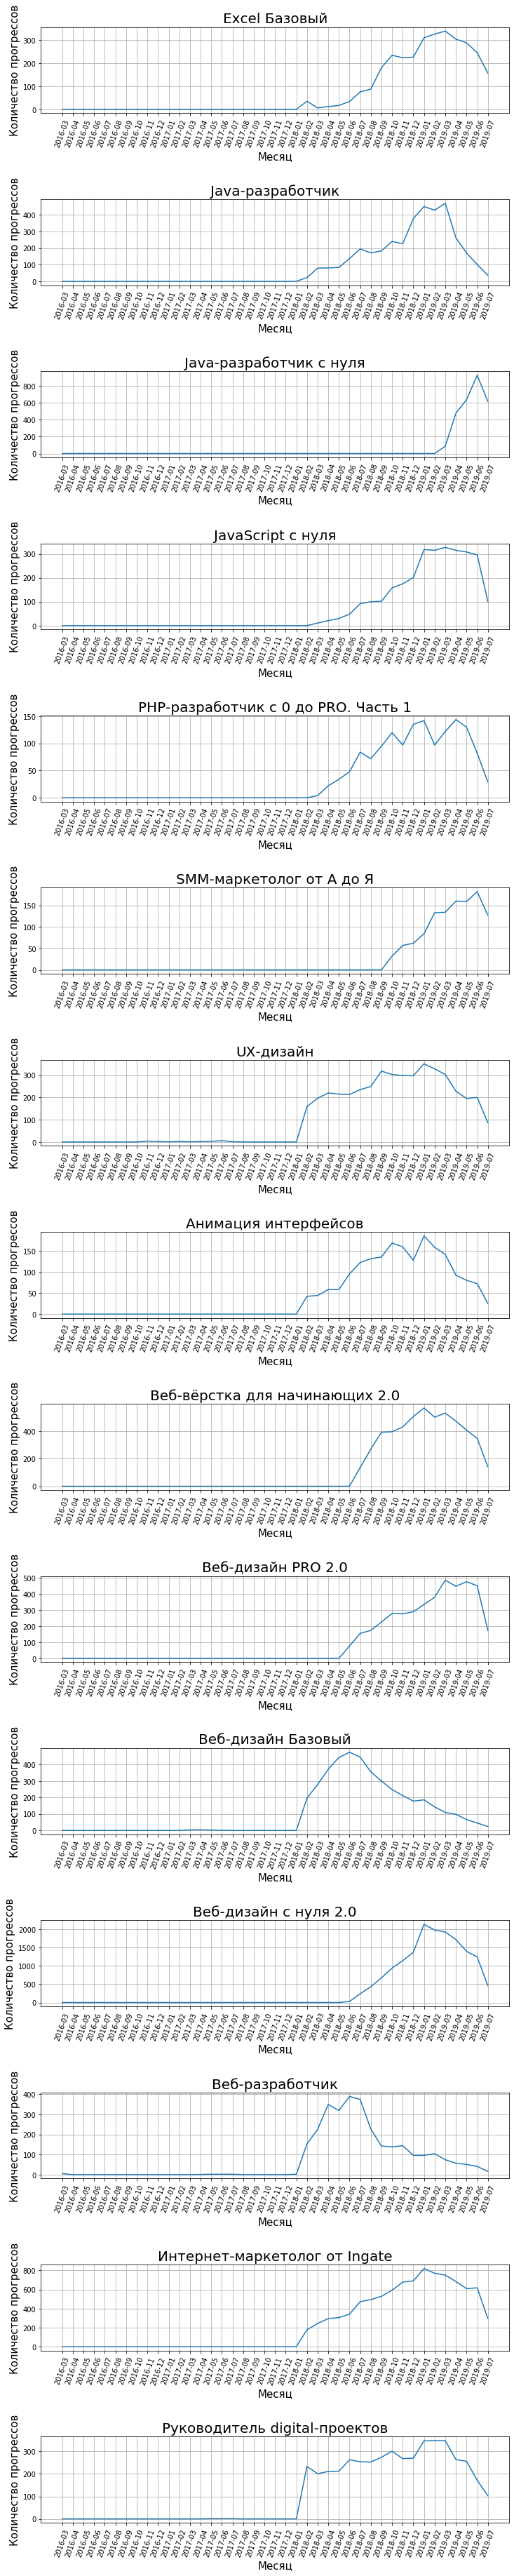

In [57]:
# задаём размер диаграмм
fig, axes = plt.subplots(courses_count, 1, figsize=(10,50))
fig.tight_layout()
plt.subplots_adjust(hspace=1)

for row in range(courses_count):

    attr = df_progress_task_1.iloc[row]['course_title']

    x = list_of_dates
    y = df_progress_task_1.iloc[row][list_of_dates]

    axes[row].plot(x, y)

    axes[row].grid(True)
    axes[row].set_title(attr, fontsize=20)
    axes[row].set_xticklabels(list_of_dates,rotation=70)
    axes[row].set_xlabel('Месяц', fontsize=15)
    axes[row].set_ylabel('Количество прогрессов', fontsize=15)

plt.show() 

6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

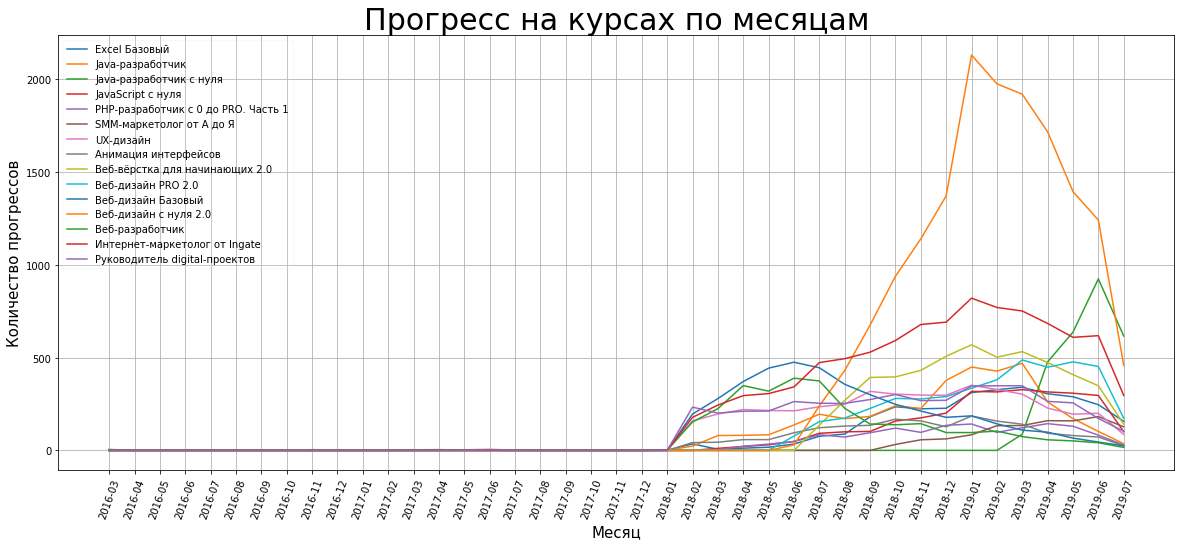

In [58]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize=(20, 8))
for row in range(courses_count):
    # задаём данные для построения line-graph 
    ax = sns.lineplot(x=df_progress_task_1[list_of_dates].columns,\
                     y=df_progress_task_1[list_of_dates].iloc[row].values)
    # задаём заголовок диаграммы
    plt.title('Прогресс на курсах по месяцам', fontsize=30)
    # задаём названия меткам
    ax.set_xticklabels(list_of_dates,rotation=70)
    ax.grid(True)
    # задаём легенду
    plt.legend(labels=df_progress_task_1['course_title'], framealpha=0.1, loc='best', fontsize=10)
    # задаём название осям
    ax.set_xlabel('Месяц', fontsize=15)
    ax.set_ylabel('Количество прогрессов', fontsize=15)

plt.show()

7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле


In [59]:
# создаём датафрейм, в котором собрали время выполнения всех д/з
df_time = table[(table['is_homework']==True)&\
               (table['status']=='done')][['course_title',\
                                           'module_number',\
                                           'student_id',\
                                           'start_date',\
                                           'finish_date']]\
                                                        .reset_index(drop=True)



In [60]:
df_time

,course_title,module_number,student_id,start_date,finish_date
0,Веб-дизайн PRO 2.0,1,768c2987a744c51ce64a5993a2a94eaf,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00
1,Веб-дизайн PRO 2.0,1,03151bc73bdb29fe1be1443c6d83e22f,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00
2,Веб-дизайн PRO 2.0,1,ed235f47e16da6e83d3f1cb511f38ea6,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00
3,Веб-дизайн PRO 2.0,1,59e8681cb7b5c8043ae1aac10c8053ca,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00
4,Веб-дизайн PRO 2.0,1,c16250079190337fe9074736e33eecb2,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00
...,...,...,...,...,...
44921,Java-разработчик c нуля,9,4e5f1ba884ba5759c07cf6e942ae5e98,2019-06-30 12:24:44.841887+00,2019-07-01 05:11:00.227931+00
44922,Java-разработчик c нуля,9,1a0acf593d0a38155bafdf29e3cba338,2019-06-29 11:22:10.230328+00,2019-07-02 20:09:44.150192+00
44923,Java-разработчик c нуля,9,ed93dfa830d97cf67eb047dd7a4aa181,2019-07-03 05:03:29.121944+00,2019-07-04 07:53:36.550522+00
44924,Java-разработчик c нуля,9,c21fa1f7fa61d11253e4cc8eeeb03027,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00


In [61]:
# преобразуем строковый тип даты к типу  datetime.datetime
df_time['start_date'] = [datetime.datetime.strptime(df_time['start_date'][i][0:18],\
                                                    "%Y-%m-%d %H:%M:%S") for i in df_time.index]

# преобразуем строковый тип даты к типу  datetime.datetime
df_time['finish_date'] = [datetime.datetime.strptime(df_time['finish_date'][i][0:18],\
                                                     "%Y-%m-%d %H:%M:%S") for i in df_time.index]
        
# вычисляем разность между временем начала и окончания выполнения домашней работы
df_time['spent_time'] = [relativedelta(df_time['finish_date'][i], df_time['start_date'][i]) for i in df_time.index]

# переводим время в секунды
df_time['spent_sec'] = [(df_time['spent_time'][x].days*24*60*60\
                         +df_time['spent_time'][x].hours*60*60\
                         +df_time['spent_time'][x].minutes*60\
                         +df_time['spent_time'][x].seconds) for x in range(len(df_time))]

In [62]:
df_time

,course_title,module_number,student_id,start_date,finish_date,spent_time,spent_sec
0,Веб-дизайн PRO 2.0,1,768c2987a744c51ce64a5993a2a94eaf,2018-06-21 19:10:03,2018-06-28 15:59:02,"relativedelta(days=+6, hours=+20, minutes=+48,...",593339
1,Веб-дизайн PRO 2.0,1,03151bc73bdb29fe1be1443c6d83e22f,2019-03-16 15:28:02,2019-03-18 09:51:01,"relativedelta(days=+1, hours=+18, minutes=+22,...",152579
2,Веб-дизайн PRO 2.0,1,ed235f47e16da6e83d3f1cb511f38ea6,2019-07-02 19:01:01,2019-07-03 18:10:05,"relativedelta(hours=+23, minutes=+9, seconds=+4)",83344
3,Веб-дизайн PRO 2.0,1,59e8681cb7b5c8043ae1aac10c8053ca,2018-07-25 09:39:05,2018-07-27 15:39:01,"relativedelta(days=+2, hours=+5, minutes=+59, ...",194396
4,Веб-дизайн PRO 2.0,1,c16250079190337fe9074736e33eecb2,2019-04-24 18:11:05,2019-04-25 10:11:02,"relativedelta(hours=+15, minutes=+59, seconds=...",57597
...,...,...,...,...,...,...,...
44921,Java-разработчик c нуля,9,4e5f1ba884ba5759c07cf6e942ae5e98,2019-06-30 12:24:04,2019-07-01 05:11:00,"relativedelta(hours=+16, minutes=+46, seconds=...",60416
44922,Java-разработчик c нуля,9,1a0acf593d0a38155bafdf29e3cba338,2019-06-29 11:22:01,2019-07-02 20:09:04,"relativedelta(days=+3, hours=+8, minutes=+47, ...",290823
44923,Java-разработчик c нуля,9,ed93dfa830d97cf67eb047dd7a4aa181,2019-07-03 05:03:02,2019-07-04 07:53:03,"relativedelta(days=+1, hours=+2, minutes=+50, ...",96601
44924,Java-разработчик c нуля,9,c21fa1f7fa61d11253e4cc8eeeb03027,2019-07-01 20:06:05,2019-07-06 04:47:04,"relativedelta(days=+4, hours=+8, minutes=+40, ...",376859


In [63]:
df_time_task_1 = pd.DataFrame(df_time.groupby(['course_title', 'module_number'])['spent_sec'].min())

df_time_task_1.rename(columns={'spent_sec':'min'}, inplace=True)

In [64]:
df_time_task_1['max'] = df_time.groupby(['course_title', 'module_number'])['spent_sec'].max().values
df_time_task_1['mean'] = df_time.groupby(['course_title', 'module_number'])['spent_sec'].mean().values
df_time_task_1['median'] = df_time.groupby(['course_title', 'module_number'])['spent_sec'].median().values
df_time_task_1

min      max           mean  \
course_title                  module_number                                
Excel Базовый                 1                0  2658060  317332.002183   
                              2                0  2353862  274148.618227   
                              3                0  2344319  253834.444444   
                              4                0  2645459  534338.287129   
                              5                0  2412423  413419.874074   
...                                          ...      ...            ...   
Руководитель digital-проектов 12               0  2641081  731238.693182   
                              13               0  2550904  921326.420290   
                              14               0  2403121  647866.468750   
                              15               0  2153701  407745.968750   
                              16               0  2244482  663022.534483   

                                               median  
course_title                  module_number            
Excel Базовый                 1              198538.0  
                              2              159721.0  
                              3              129297.0  
                              4              271920.0  
                              5              251999.0  
...                                               ...  
Руководитель digital-проектов 12             539369.5  
                              13             769621.0  
                              14             622138.5  
                              15             211949.5  
                              16             569130.0  

[191 rows x 4 columns]

2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки


In [65]:
df_for_plot = df_time_task_1.reset_index(['course_title', 'module_number'])\
                            .set_index('course_title')[['module_number','median']]

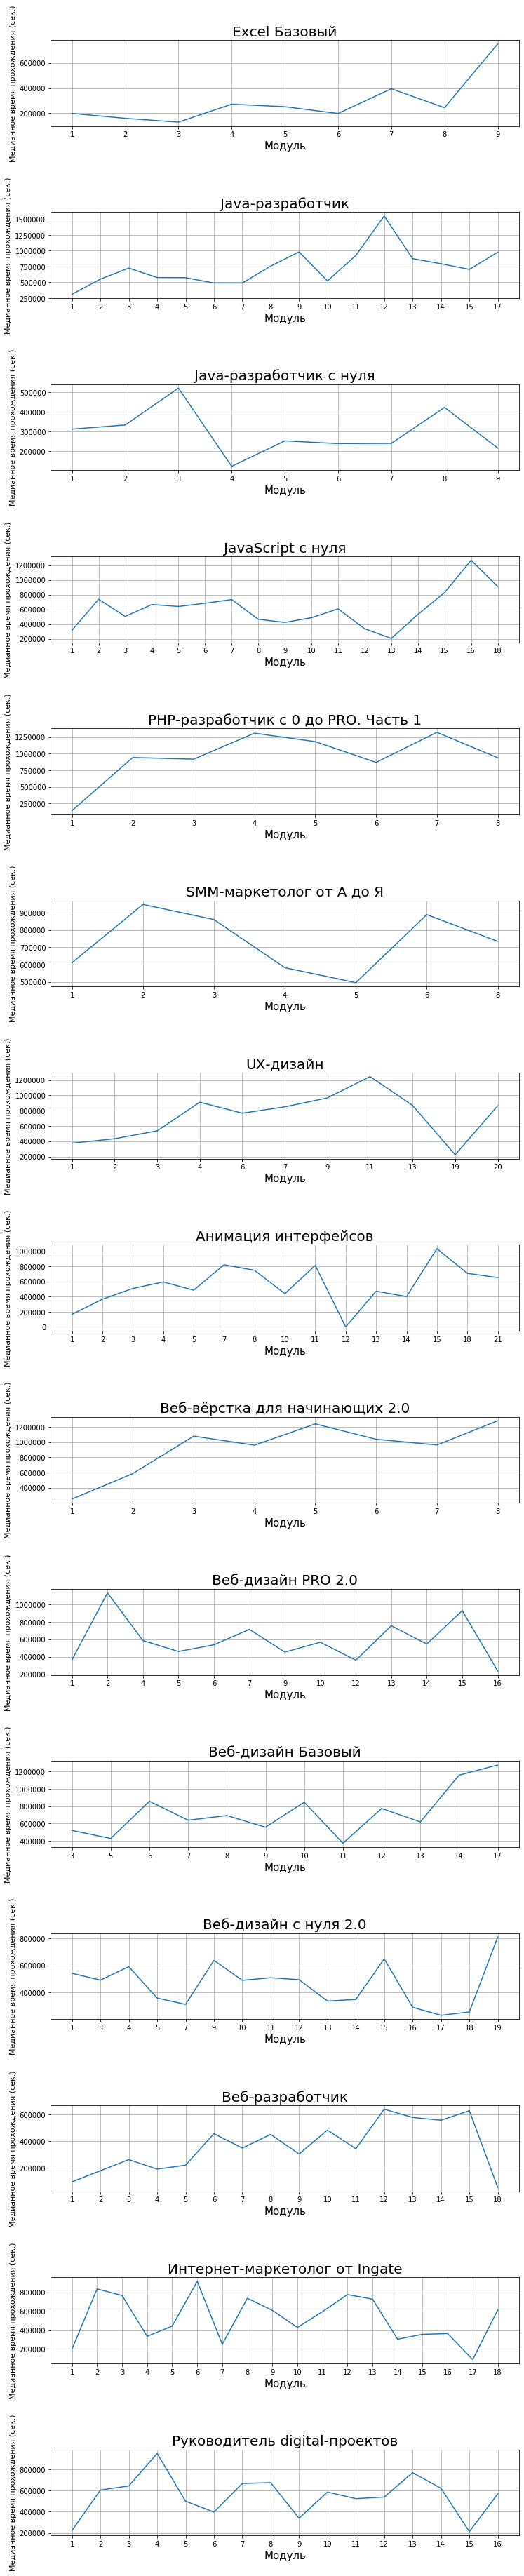

In [66]:
plot_names = df_for_plot.index.unique()

n = len(plot_names)

# задаём размер диаграмм
fig, axes = plt.subplots(n, 1, figsize=(10,50))
fig.tight_layout()
plt.subplots_adjust(hspace=1)

for row in range(n):

    attr = plot_names[row]

    x = list(range(1,len(df_for_plot.loc[attr]['module_number'])+1))
    y = df_for_plot.loc[attr]['median'].values

    axes[row].plot(x, y)

    axes[row].grid(True)
    axes[row].set_title(attr, fontsize=20)
    plt.sca(axes[row])
    plt.xticks(x, list(df_for_plot.loc[attr]['module_number'])) 

    axes[row].set_xticklabels(df_for_plot.loc[attr]['module_number'].values)
    axes[row].set_xlabel('Модуль', fontsize=15)
    axes[row].set_ylabel('Медианное время прохождения (сек.)', fontsize=11)

    
plt.show() 

3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 


In [67]:
df_time_task_3 = df_time[['course_title','module_number','start_date','finish_date','spent_sec']].copy()
df_time_task_3['month'] = pd.DatetimeIndex(df_time_task_3['start_date']).month
df_time_task_3

,course_title,module_number,start_date,finish_date,spent_sec,month
0,Веб-дизайн PRO 2.0,1,2018-06-21 19:10:03,2018-06-28 15:59:02,593339,6
1,Веб-дизайн PRO 2.0,1,2019-03-16 15:28:02,2019-03-18 09:51:01,152579,3
2,Веб-дизайн PRO 2.0,1,2019-07-02 19:01:01,2019-07-03 18:10:05,83344,7
3,Веб-дизайн PRO 2.0,1,2018-07-25 09:39:05,2018-07-27 15:39:01,194396,7
4,Веб-дизайн PRO 2.0,1,2019-04-24 18:11:05,2019-04-25 10:11:02,57597,4
...,...,...,...,...,...,...
44921,Java-разработчик c нуля,9,2019-06-30 12:24:04,2019-07-01 05:11:00,60416,6
44922,Java-разработчик c нуля,9,2019-06-29 11:22:01,2019-07-02 20:09:04,290823,6
44923,Java-разработчик c нуля,9,2019-07-03 05:03:02,2019-07-04 07:53:03,96601,7
44924,Java-разработчик c нуля,9,2019-07-01 20:06:05,2019-07-06 04:47:04,376859,7


In [68]:
df_time_task_3.groupby(['course_title', 'month'])['spent_sec'].median()

course_title                   month
Excel Базовый                  1        188220.0
                               2        192780.0
                               3        244083.0
                               4        167611.5
                               5        208528.5
                                          ...   
Руководитель digital-проектов  8        820499.0
                               9        763685.0
                               10       404398.0
                               11       502410.5
                               12       645540.0
Name: spent_sec, Length: 171, dtype: float64

4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐


In [69]:
df_for_plot_2 = pd.DataFrame(df_time_task_3.groupby(['course_title', 'month'])['spent_sec'].median())
df_for_plot_2.rename(columns = {'spent_sec':'median'}, inplace = True)
df_for_plot_2 = df_for_plot_2.reset_index(['course_title', 'month'])\
                            .set_index('course_title')[['month','median']]
df_for_plot_2

,month,median
course_title,,
Excel Базовый,1,188220.0
Excel Базовый,2,192780.0
Excel Базовый,3,244083.0
Excel Базовый,4,167611.5
Excel Базовый,5,208528.5
...,...,...
Руководитель digital-проектов,8,820499.0
Руководитель digital-проектов,9,763685.0
Руководитель digital-проектов,10,404398.0


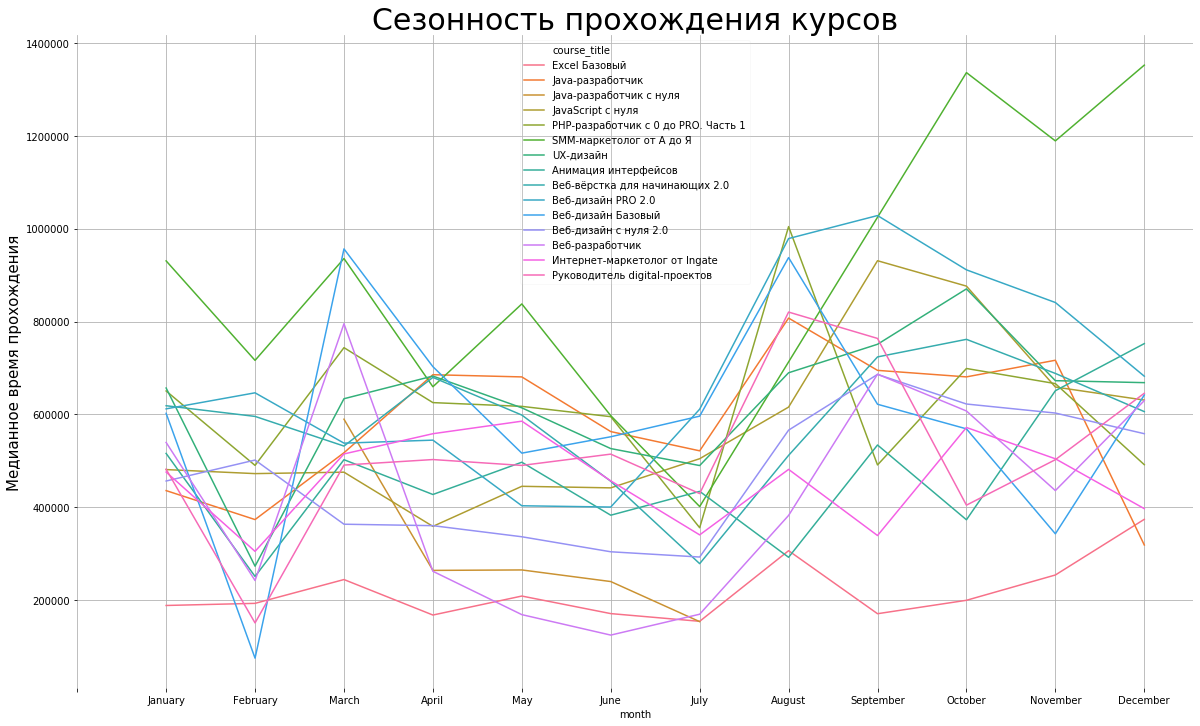

In [70]:
# задаём размер диаграммы
fig, ax = plt.subplots(figsize=(20, 12))
# задаём данные для построения bar-chart диаграммы
ax = sns.lineplot(x=df_for_plot_2['month'],\
                 y=df_for_plot_2['median'],\
                 hue=df_for_plot_2.index)

list_of_months = [calendar.month_name[x] for x in list(range(0,13))]

# задаём заголовок диаграммы
plt.title('Сезонность прохождения курсов', fontsize=30)

# отключаем отображение рамок
#ax.axis('off')
# задаём легенду
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=labs, framealpha=0.1, loc='best', fontsize=10)

#ax.figure(figsize=(15,10))
plt.xticks(ticks=range(len(list_of_months)), labels=list_of_months)

ax.grid(True)

plt.box(False)
#plt.set_xlabel('Месяц', fontsize=15)
ax.set_ylabel('Медианное время прохождения', fontsize=15)

plt.show()


5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [71]:
df_conv = table[(table['is_homework']==True)][['course_title',\
                                           'student_id',\
                                           'module_number',\
                                               'module_title',\
                                               'status',\
                                           'start_date',\
                                           'finish_date']]

In [72]:
df_conv_task_1 = pd.DataFrame(df_conv.groupby(['course_title', 'module_number', 'module_title'])['student_id'].unique())

In [73]:
df_conv_task_1['count'] = [len(x) for x in df_conv_task_1['student_id']]

In [74]:
df_conv_task_1 = df_conv_task_1.reset_index(['course_title',\
                                             'module_number',\
                                             'module_title'])[['course_title',\
                                                               'module_number',\
                                                               'module_title',\
                                                               'count']]

In [75]:
df_conv_task_1.rename(columns={'count':'count_start'}, inplace=True)

In [76]:
df_conv_task_1['count_finish'] = 0

In [77]:
df_conv_task_2 = pd.DataFrame(df_conv[df_conv['status']=='done'].groupby(['course_title',\
                                                                          'module_number'])['student_id'].unique())


In [78]:
df_conv_task_2['count'] = [len(x) for x in df_conv_task_2['student_id']]

In [79]:
df_conv_task_2 = df_conv_task_2.reset_index(['course_title',\
                                             'module_number'])[['course_title',\
                                                                'module_number',\
                                                                'count']]

In [80]:
df_conv_task_2.rename(columns={'count':'count_finish'}, inplace=True)

In [81]:
for i in df_conv_task_1.index:
    df_conv_task_1.at[i, 'count_finish'] = df_conv_task_2.iloc[i]['count_finish']

In [82]:
big_conv_list = []
for i in df_conv_task_1['course_title'].unique():
    conv_list = [100]
    first_val = df_conv_task_1[df_conv_task_1['course_title']==i]['module_number'].unique()[0]
    prev_b = df_conv_task_1[(df_conv_task_1['course_title']==i)&(df_conv_task_1['module_number']==first_val)]['count_start']
    for j in df_conv_task_1[df_conv_task_1['course_title']==i]['module_number'][1:].unique():
        a = df_conv_task_1[(df_conv_task_1['course_title']==i)&(df_conv_task_1['module_number']==j)]['count_start'].values[0]
        b = prev_b.values[0]
        
        '''
        print('A, B')
        print(a)
        print(b)
        '''
        prev_b = df_conv_task_1[(df_conv_task_1['course_title']==i)&(df_conv_task_1['module_number']==j)]['count_finish']   
        conv_list.append((a/b)*100)
        
    big_conv_list += conv_list

df_conv_task_1['conversion'] = big_conv_list

In [83]:
df_conv_task_1

,course_title,module_number,module_title,count_start,count_finish,conversion
0,Excel Базовый,1,Основной функционал Excel,518,458,100.000000
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,406,83.783784
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,387,98.029557
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303,89.147287
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270,98.349835
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,88,96.938776
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,69,98.863636
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,64,102.898551
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64,103.125000


3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

In [84]:
df_conv_task_1[df_conv_task_1['course_title']==df_conv_task_1['course_title'].unique()[1]]

,course_title,module_number,module_title,count_start,count_finish,conversion
9,Java-разработчик,1,Вводный модуль,627,563,100.000000
10,Java-разработчик,2,Синтаксис языка,521,427,83.094099
11,Java-разработчик,3,Объекты и классы,374,294,87.587822
12,Java-разработчик,4,"Числа, строки и даты",283,232,96.258503
13,Java-разработчик,5,Массивы и коллекции,216,173,93.103448
14,Java-разработчик,6,Наследование и полиморфизм,175,160,101.156069
15,Java-разработчик,7,Тестирование и отладка,158,142,98.750000
16,Java-разработчик,8,Основы построения GUI,136,106,95.774648
17,Java-разработчик,9,Внешний вид GUI и рисование,112,74,105.660377
18,Java-разработчик,10,Работа с файлами и сетью,75,66,101.351351


In [85]:
df_conv_task_1[df_conv_task_1['course_title']==df_conv_task_1['course_title'].unique()[row]]['conversion'].median()

99.76744186046511

Excel Базовый
Java-разработчик
Java-разработчик c нуля
JavaScript с нуля
PHP-разработчик с 0 до PRO. Часть 1
SMM-маркетолог от А до Я
UX-дизайн
Анимация интерфейсов
Веб-вёрстка для начинающих 2.0
Веб-дизайн PRO 2.0
Веб-дизайн Базовый
Веб-дизайн с нуля 2.0
Веб-разработчик
Интернет-маркетолог от Ingate
Руководитель digital-проектов


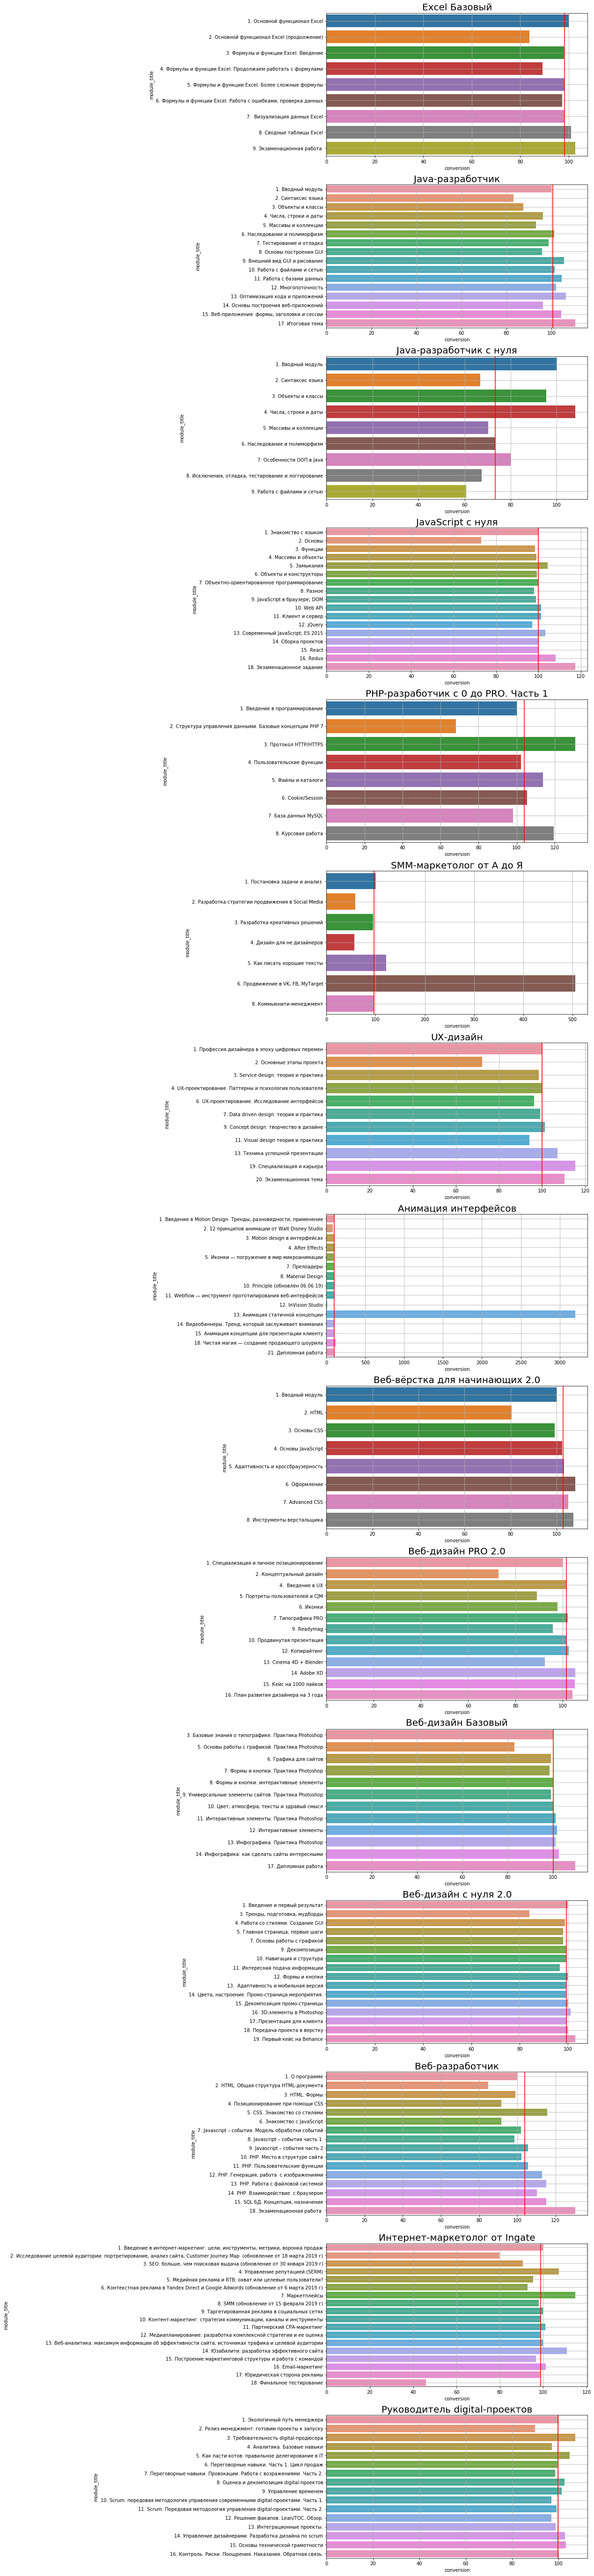

In [86]:
# задаём размер диаграммы
fig, axes = plt.subplots(n, 1, figsize=(10, 100))

for row in range(n):
    # задаём данные для построения bar-chart диаграммы
    data_frame = df_conv_task_1[df_conv_task_1['course_title']==df_conv_task_1['course_title'].unique()[row]]
    sns.barplot(ax=axes[row], data=data_frame,\
                      y='module_title',\
                           x='conversion')
    #print(df_conv_task_1['course_title'].unique()[row])
    # задаём заголовок диаграммы
    axes[row].set_title(df_conv_task_1['course_title'].unique()[row], fontsize=20)
    print(df_conv_task_1['course_title'].unique()[row])
    # строим медиану
    axes[row].axvline(x=data_frame['conversion'].median(), color='r')
    # отключаем отображение рамок
    #print(data_frame)
    #for i in list(data_frame.index):
        #print(str(data_frame['module_number'].iloc[i])+'. '+str(data_frame['module_title'].iloc[i]))
    list_of_titles = [str(str(df_conv_task_1.iloc[x]['module_number'])+'. '+df_conv_task_1.iloc[x]['module_title']) for x in data_frame.index]
    #print(data_frame)
    axes[row].set_yticklabels(labels = list_of_titles)
    #locs, labels = axes[row].xticks()
    #ax.box(True)
    # задаём легенду
    #hands, labs = axes[row].get_legend_handles_labels()
    #axes[row].legend(handles=hands, labels=labs, framealpha=0.1, loc='upper left', fontsize=10)
    axes[row].grid(True)
    #axes[row].xticks([])
    # отрисовываем диаграмму
plt.show()


## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [87]:
# создаём датафрейм, в котором собрали время выполнения всех заданий
df_metric = table[(table['status']=='done')][['course_title',\
                                           'module_number',\
                                              'lesson_number',\
                                              'student_id',\
                                           'start_date',\
                                           'finish_date']]\
                                                        .reset_index(drop=True)


In [88]:
df_metric

,course_title,module_number,lesson_number,student_id,start_date,finish_date
0,Веб-дизайн PRO 2.0,2,4,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,Веб-дизайн PRO 2.0,2,4,03151bc73bdb29fe1be1443c6d83e22f,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00
2,Веб-дизайн PRO 2.0,2,4,ed235f47e16da6e83d3f1cb511f38ea6,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00
3,Веб-дизайн PRO 2.0,2,4,59e8681cb7b5c8043ae1aac10c8053ca,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00
4,Веб-дизайн PRO 2.0,2,4,c16250079190337fe9074736e33eecb2,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00
...,...,...,...,...,...,...
334504,Java-разработчик c нуля,9,14,c21fa1f7fa61d11253e4cc8eeeb03027,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00
334505,Java-разработчик c нуля,9,14,4e5f1ba884ba5759c07cf6e942ae5e98,2019-07-01 14:35:47.629736+00,2019-07-12 03:36:51.775851+00
334506,Java-разработчик c нуля,9,15,c21fa1f7fa61d11253e4cc8eeeb03027,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00
334507,Java-разработчик c нуля,9,15,4e5f1ba884ba5759c07cf6e942ae5e98,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00


In [89]:
# преобразуем строковый тип даты к типу  datetime.datetime
df_metric['start_date'] = [datetime.datetime.strptime(df_metric['start_date'][i][0:18],\
                                                      "%Y-%m-%d %H:%M:%S") for i in df_metric.index]

# преобразуем строковый тип даты к типу  datetime.datetime
df_metric['finish_date'] = [datetime.datetime.strptime(df_metric['finish_date'][i][0:18],\
                                                       "%Y-%m-%d %H:%M:%S") for i in df_metric.index]
        
# вычисляем разность между временем начала и окончания прохождения урока
df_metric['spent_time'] = [relativedelta(df_metric['finish_date'][i],\
                                         df_metric['start_date'][i]) for i in df_metric.index]
# переводим затраченное время в секунды
df_metric['spent_sec'] = [(df_metric['spent_time'][x].days*24*60*60\
                           +df_metric['spent_time'][x].hours*60*60\
                           +df_metric['spent_time'][x].minutes*60\
                           +df_metric['spent_time'][x].seconds) for x in range(len(df_metric))]


In [90]:
df_metric.head()

,course_title,module_number,lesson_number,student_id,start_date,finish_date,spent_time,spent_sec
0,Веб-дизайн PRO 2.0,2,4,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:28:05,2018-06-23 08:28:05,relativedelta(),0
1,Веб-дизайн PRO 2.0,2,4,03151bc73bdb29fe1be1443c6d83e22f,2019-03-18 14:23:01,2019-03-18 14:54:05,"relativedelta(minutes=+31, seconds=+4)",1864
2,Веб-дизайн PRO 2.0,2,4,ed235f47e16da6e83d3f1cb511f38ea6,2019-07-09 09:18:04,2019-07-11 08:03:00,"relativedelta(days=+1, hours=+22, minutes=+44,...",168296
3,Веб-дизайн PRO 2.0,2,4,59e8681cb7b5c8043ae1aac10c8053ca,2018-07-27 15:39:01,2018-07-27 16:13:05,"relativedelta(minutes=+34, seconds=+4)",2044
4,Веб-дизайн PRO 2.0,2,4,c16250079190337fe9074736e33eecb2,2019-04-24 18:42:04,2019-04-24 18:44:05,"relativedelta(minutes=+2, seconds=+1)",121


In [91]:
# вычисляем среднее время, которое конкретный студент тратит на выполнение модуля
df_metric_task_1 = pd.DataFrame(df_metric.groupby(['course_title', 'module_number','student_id'])['spent_sec'].mean())
df_metric_task_1.rename(columns={'spent_sec':'mean'}, inplace=True)
df_metric_task_1.reset_index(['course_title', 'module_number','student_id'], inplace=True)

In [92]:
# вычисляем медианное время, которое студенты тратят на выполнение каждого урока
df_metric_task_2 = pd.DataFrame(df_metric.groupby(['course_title', 'module_number', 'lesson_number'])['spent_sec'].median())
df_metric_task_2.rename(columns={'spent_sec':'median'}, inplace=True)
df_metric_task_2.reset_index(['course_title', 'module_number', 'lesson_number'], inplace=True)

In [93]:
# вычисляем среднее время, которое студенты тратят на выполнение каждого модуля
df_metric_task_3 = pd.DataFrame(df_metric_task_2.groupby(['course_title', 'module_number'])['median'].mean())
df_metric_task_3.rename(columns={'median':'mean_median'}, inplace=True)
df_metric_task_3.reset_index(['course_title', 'module_number'], inplace=True)

In [94]:
df_metric_task_3

,course_title,module_number,mean_median
0,Excel Базовый,1,24517.000000
1,Excel Базовый,2,23743.785714
2,Excel Базовый,3,54148.833333
3,Excel Базовый,4,43727.071429
4,Excel Базовый,5,51496.000000
...,...,...,...
224,Руководитель digital-проектов,13,207870.250000
225,Руководитель digital-проектов,14,90706.357143
226,Руководитель digital-проектов,15,18186.958333
227,Руководитель digital-проектов,16,73893.875000


In [95]:
mod = df_metric_task_1[(df_metric_task_1['student_id']=='768c2987a744c51ce64a5993a2a94eaf')&(df_metric_task_1['course_title']=='Анимация интерфейсов')]['module_number'].values
#df_metric_task_1[(df_metric_task_1['student_id']=='768c2987a744c51ce64a5993a2a94eaf')&(df_metric_task_1['course_title']=='Анимация интерфейсов')&(df_metric_task_1['module_number'] in mod)]


In [96]:
df_metric[df_metric['student_id']=='768c2987a744c51ce64a5993a2a94eaf']

,course_title,module_number,lesson_number,student_id,start_date,finish_date,spent_time,spent_sec
0,Веб-дизайн PRO 2.0,2,4,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:28:05,2018-06-23 08:28:05,relativedelta(),0
520,Веб-дизайн PRO 2.0,1,1,768c2987a744c51ce64a5993a2a94eaf,2018-06-20 14:25:02,2018-06-20 15:45:00,"relativedelta(hours=+1, minutes=+19, seconds=+58)",4798
1579,Веб-дизайн PRO 2.0,2,2,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:18:00,2018-06-23 08:18:01,relativedelta(seconds=+1),1
2122,Веб-дизайн PRO 2.0,1,4,768c2987a744c51ce64a5993a2a94eaf,2018-06-20 16:00:00,2018-06-21 19:09:03,"relativedelta(days=+1, hours=+3, minutes=+9, s...",97743
2859,Веб-дизайн PRO 2.0,1,6,768c2987a744c51ce64a5993a2a94eaf,2018-06-21 19:10:03,2018-06-28 15:59:02,"relativedelta(days=+6, hours=+20, minutes=+48,...",593339
3400,Веб-дизайн PRO 2.0,2,1,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:18:00,2018-06-23 08:18:00,relativedelta(),0
3960,Веб-дизайн PRO 2.0,1,3,768c2987a744c51ce64a5993a2a94eaf,2018-06-20 15:58:02,2018-06-20 16:00:00,"relativedelta(minutes=+1, seconds=+58)",118
5074,Веб-дизайн PRO 2.0,1,2,768c2987a744c51ce64a5993a2a94eaf,2018-06-20 15:45:00,2018-06-20 15:58:02,"relativedelta(minutes=+13, seconds=+2)",782
5937,Веб-дизайн PRO 2.0,1,5,768c2987a744c51ce64a5993a2a94eaf,2018-06-21 19:09:03,2018-06-21 19:10:03,relativedelta(minutes=+1),60
6645,Веб-дизайн PRO 2.0,2,3,768c2987a744c51ce64a5993a2a94eaf,2018-06-23 08:18:01,2018-06-23 08:28:05,"relativedelta(minutes=+10, seconds=+4)",604


In [98]:
import math
import statistics

In [99]:
# создаём список студентов, которые приобрели хотя бы один курс
stud_paid_list = list(df_metric['student_id'].unique())
# формируем датафрейм для статусов студентов
status_df = pd.DataFrame(stud_paid_list, columns=['id'])
# записываем курсы, которые у них есть
status_df['courses'] = [[y for y in df_metric_task_1[df_metric_task_1['student_id']==x]['course_title'].unique()] for x in stud_paid_list]

In [100]:
total_list = []
list_len = len(stud_paid_list)
# проходим посписку студентов с оплаченными курсами
for i in stud_paid_list:
    # проходим по всем курсам, что есть у этого студента 
    for j in status_df[status_df['id']==i]['courses']:
        curr_list = []
        # находим все модули, которые студент уже выполнил
        for k in j:
            modules_num = list(df_metric_task_1[(df_metric_task_1['student_id']==i)\
                                                &(df_metric_task_1['course_title']==k)]['module_number'].values)
            summary = 0
            # суммируем средние медианные значения времени по пройденным модулям
            for l in modules_num:
                summary += df_metric_task_3[(df_metric_task_3['course_title']==k)\
                                            &(df_metric_task_3['module_number']==l)]['mean_median'].values
            
            # вычисляем среднее средних значений времени выполнения модулей
            curr_mean = df_metric_task_1[(df_metric_task_1['student_id']==i)\
                                         &(df_metric_task_1['course_title']==k)]['mean'].mean()  
            # вычисленные значения между собой
            if summary/len(modules_num) >= curr_mean:
                curr_list.append(0)
            else:
                curr_list.append(1)
                
        total_list.append(curr_list)
print(total_list)       

[[0, 0, 0], [1, 1, 1, 1], [0, 1], [0, 1, 1], [0, 1], [0, 1, 0, 1, 1, 1], [1, 1], [1, 1, 1, 1, 0], [0, 0], [0, 0, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1], [1], [0, 0], [1, 1], [0, 1], [1, 0, 1], [1, 1, 1], [1, 1, 1], [1, 1], [1, 1, 1, 1], [0, 0], [0], [1, 1, 1], [1, 1, 1, 0], [1, 0], [1, 1], [0, 1], [0, 0], [1, 1], [0, 1], [0, 1, 1, 0], [1, 1, 1], [0, 0, 1, 0, 1], [1, 1], [1, 1, 0], [0, 1], [1, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1], [1, 1, 1], [1, 0, 0, 1], [1, 1], [0, 1, 1, 1, 1, 1], [0, 1], [1, 1, 1], [1, 1], [1, 1], [0, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [0, 1], [1, 1], [1, 1, 1], [1, 1], [1, 0, 0, 0, 1], [1, 1], [0, 0], [1, 0], [1, 1], [1, 1, 1], [1, 1], [1, 1, 1, 1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], [1], [1, 1], [1, 0], [0], [1, 1, 1, 1, 1], [0, 1], [1, 1, 1, 1], [1, 1], [0, 1], [1, 1], [1, 1, 1], [0, 1, 1], [0, 0], [0, 1], [1], [1, 1, 0], [1, 1, 1, 1], [0, 1], [0, 0], [1, 1], [0, 1, 0, 1, 0, 1, 1], [1, 1], [1], [1, 0, 1], [1], 

In [104]:
# записываем вычисленные статусы
status_df['statuses'] = total_list
# приводим к медианным значениям с округлением вниз 
status_df['status'] = [math.floor(statistics.median(x)) for x in status_df['statuses']] 
status_df

,id,courses,statuses,status
0,768c2987a744c51ce64a5993a2a94eaf,"[JavaScript с нуля, Анимация интерфейсов, Веб-...","[0, 0, 0]",0
1,03151bc73bdb29fe1be1443c6d83e22f,"[UX-дизайн, Анимация интерфейсов, Веб-дизайн P...","[1, 1, 1, 1]",1
2,ed235f47e16da6e83d3f1cb511f38ea6,"[Веб-дизайн PRO 2.0, Веб-дизайн с нуля 2.0]","[0, 1]",0
3,59e8681cb7b5c8043ae1aac10c8053ca,"[Excel Базовый, Анимация интерфейсов, Веб-диза...","[0, 1, 1]",1
4,c16250079190337fe9074736e33eecb2,"[Веб-дизайн PRO 2.0, Веб-дизайн с нуля 2.0]","[0, 1]",0
...,...,...,...,...
9230,a88d8e65143914ccc002c8abbe91324e,[Java-разработчик c нуля],[1],1
9231,5b9acd377d0d1b1f2e9e324a44dd0c8a,[Java-разработчик c нуля],[0],0
9232,71b5e788516d8e83fb9dc3b5f869dd5b,[Java-разработчик c нуля],[0],0
9233,0b77dc9de3ebc312a2ff105bef4b443b,[Java-разработчик c нуля],[1],1


In [106]:
# соединяем таблицы
final_df = pd.merge(status_df,\
                    students,\
                    on='id')
# удаляем ненужные и промежуточные атрибуты
final_df.drop(columns=['statuses','courses','id_','birthday'], inplace=True)
final_df

,id,status,city,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
0,768c2987a744c51ce64a5993a2a94eaf,0,Санкт-Петербург,True,3,False,True,True,5,31
1,03151bc73bdb29fe1be1443c6d83e22f,1,Санкт-Петербург,True,3,True,False,False,6,27
2,ed235f47e16da6e83d3f1cb511f38ea6,0,Москва,True,2,True,False,False,6,30
3,59e8681cb7b5c8043ae1aac10c8053ca,1,Самара,True,3,False,True,False,5,26
4,c16250079190337fe9074736e33eecb2,0,Москва,True,2,False,False,True,5,27
...,...,...,...,...,...,...,...,...,...,...
9230,a88d8e65143914ccc002c8abbe91324e,1,Томск,True,2,True,False,True,4,37
9231,5b9acd377d0d1b1f2e9e324a44dd0c8a,0,Lausanne,True,2,False,False,True,6,47
9232,71b5e788516d8e83fb9dc3b5f869dd5b,0,Омск,False,2,True,True,False,6,35
9233,0b77dc9de3ebc312a2ff105bef4b443b,1,Тимашевск,False,3,False,True,False,5,52


In [138]:
ml_df.describe()

,status,city,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
count,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000
mean,0.711965,340.881646,0.873525,2.447212,0.220249,0.542826,0.535246,5.408230,36.410179
std,0.452872,413.253001,0.332402,0.572359,0.414437,0.498190,0.498783,2.260321,9.480451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.000000,29.000000
50%,1.000000,139.000000,1.000000,2.000000,0.000000,1.000000,1.000000,6.000000,35.000000
75%,1.000000,602.000000,1.000000,3.000000,0.000000,1.000000,1.000000,7.000000,41.000000
max,1.000000,1485.000000,1.000000,3.000000,1.000000,1.000000,1.000000,9.000000,67.000000


In [139]:
# кодируем название городов
cities = final_df['city'].unique()
cities_dict = dict(zip(cities, range(len(cities))))
ml_df = final_df.applymap(lambda s: cities_dict.get(s) if s in cities_dict else s)

# заменяем быстрым способом переменные типа boolean на тип integer
ml_df = ml_df.drop(columns=['id'])*1
ml_df.head()

,status,city,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
0,0,0,1,3,0,1,1,5,31
1,1,0,1,3,1,0,0,6,27
2,0,1,1,2,1,0,0,6,30
3,1,2,1,3,0,1,0,5,26
4,0,1,1,2,0,0,1,5,27


In [111]:
ml_df.corr(method='pearson')

,status,city,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
status,1.000000,-0.179421,0.002572,-0.001845,-0.016235,-0.005799,0.009951,0.002739,-0.035488
city,-0.179421,1.000000,0.006663,-0.014571,-0.007851,0.035416,-0.014829,-0.008918,-0.002340
is_working,0.002572,0.006663,1.000000,0.132823,0.011203,0.051023,0.045179,0.111535,0.010587
education,-0.001845,-0.014571,0.132823,1.000000,0.041259,0.138673,0.090827,0.209775,0.007144
is_married,-0.016235,-0.007851,0.011203,0.041259,1.000000,0.013580,0.016402,0.017880,0.020443
works_by_profession,-0.005799,0.035416,0.051023,0.138673,0.013580,1.000000,0.034783,0.069584,-0.004087
has_children,0.009951,-0.014829,0.045179,0.090827,0.016402,0.034783,1.000000,0.150821,0.001019
work_places_cnt,0.002739,-0.008918,0.111535,0.209775,0.017880,0.069584,0.150821,1.000000,-0.002367
age,-0.035488,-0.002340,0.010587,0.007144,0.020443,-0.004087,0.001019,-0.002367,1.000000


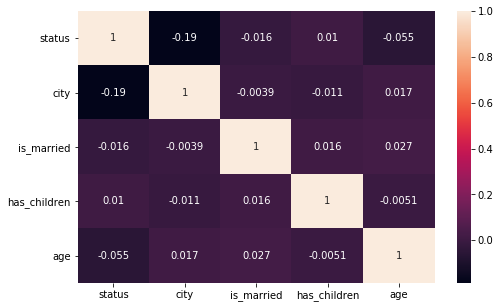

In [160]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
sns.heatmap(ml_df[['status', 'city','is_married', 'has_children', 'age']].corr(method='spearman'), annot=True)
plt.show()

In [113]:
ml_df.corr(method='kendall')

,status,city,is_working,education,is_married,works_by_profession,has_children,work_places_cnt,age
status,1.000000,-0.154657,0.002572,-0.005974,-0.016235,-0.005799,0.009951,0.000931,-0.045544
city,-0.154657,1.000000,0.003162,-0.006363,-0.003201,0.030674,-0.008969,-0.003669,0.011610
is_working,0.002572,0.003162,1.000000,0.073740,0.011203,0.051023,0.045179,0.068160,0.011225
education,-0.005974,-0.006363,0.073740,1.000000,0.025479,0.111110,0.059629,0.094641,0.002164
is_married,-0.016235,-0.003201,0.011203,0.025479,1.000000,0.013580,0.016402,0.005808,0.022344
works_by_profession,-0.005799,0.030674,0.051023,0.111110,0.013580,1.000000,0.034783,0.042813,0.001060
has_children,0.009951,-0.008969,0.045179,0.059629,0.016402,0.034783,1.000000,0.097641,-0.004201
work_places_cnt,0.000931,-0.003669,0.068160,0.094641,0.005808,0.042813,0.097641,1.000000,-0.004942
age,-0.045544,0.011610,0.011225,0.002164,0.022344,0.001060,-0.004201,-0.004942,1.000000


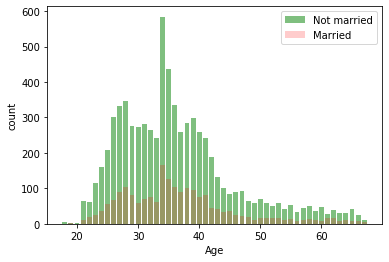

In [189]:
from sklearn.model_selection import train_test_split
import scipy

data_0 = scipy.stats.itemfreq(ml_df['age'][ml_df['is_married']==0])
data_1 = scipy.stats.itemfreq(ml_df['age'][ml_df['is_married']==1])
plt.bar(data_0.T[0],\
        height=data_0.T[1],\
        color='g', alpha=0.5)
plt.bar(data_1.T[0],\
        height=data_1.T[1],\
        color='r', alpha=0.2)
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(labels=['Not married', 'Married'])
plt.show()

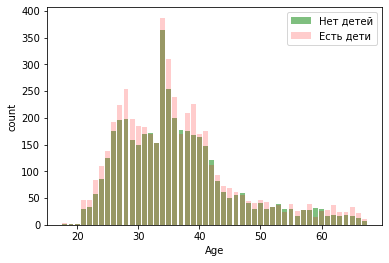

In [199]:
data_0 = scipy.stats.itemfreq(ml_df['age'][ml_df['has_children']==0])
data_1 = scipy.stats.itemfreq(ml_df['age'][ml_df['has_children']==1])
plt.bar(data_0.T[0],\
        height=data_0.T[1],\
        color='g', alpha=0.5)
plt.bar(data_1.T[0],\
        height=data_1.T[1],\
        color='r', alpha=0.2)
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(labels=['Нет детей', 'Есть дети'])
plt.show()

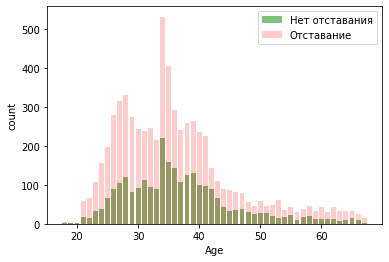

In [191]:
data_0 = scipy.stats.itemfreq(ml_df['age'][ml_df['status']==0])
data_1 = scipy.stats.itemfreq(ml_df['age'][ml_df['status']==1])
plt.bar(data_0.T[0],\
        height=data_0.T[1],\
        color='g', alpha=0.5)
plt.bar(data_1.T[0],\
        height=data_1.T[1],\
        color='r', alpha=0.2)
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(labels=['Нет отставания', 'Отставание'])
plt.show()

No handles with labels found to put in legend.


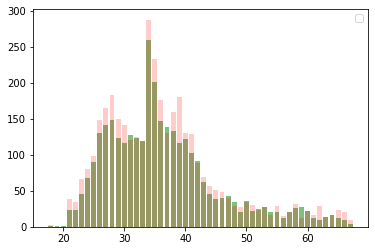

In [185]:
# отделяем атрибуты от меток
X = np.array(ml_df['age'])
y = np.array(ml_df['has_children'])

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)

plt.bar(scipy.stats.itemfreq(X_train[y_train==0]).T[0],\
        height=scipy.stats.itemfreq(X_train[y_train==0]).T[1],\
        color='g', alpha=0.5)
plt.bar(scipy.stats.itemfreq(X_train[y_train==1]).T[0],\
        height=scipy.stats.itemfreq(X_train[y_train==1]).T[1],\
        color='r', alpha=0.2)
plt.legend()
plt.show()

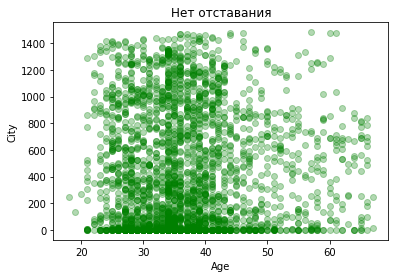

In [196]:
# отделяем атрибуты от меток
X = np.array(ml_df[['age','city']])
y = np.array(ml_df['status'])


plt.scatter(X[y==0,0], X[y==0,1], color='g', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('City')
plt.title('Нет отставания')
plt.show()

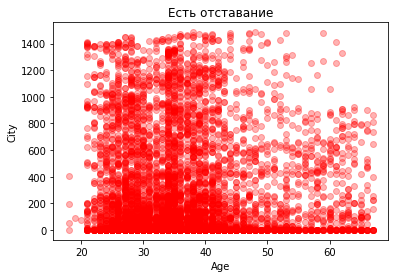

In [197]:
plt.scatter(X[y==1,0], X[y==1,1], color='r', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('City')
plt.title('Есть отставание')
plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [234]:
# отделяем атрибуты от меток
X = ml_df[['city','is_married', 'has_children', 'age']]
y = ml_df['status']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)


In [239]:
# создаём экземпляр модели
log_reg = LogisticRegression(max_iter = 50)
# обучаем модель
log_reg.fit(X_train, y_train)
# вычисляем точность для заданных тестовых данных и меток
log_reg.score(X_test, y_test)

0.7080987440450411

In [240]:
# предсказываем новые данные
y_pred = log_reg.predict(X_test)
# матрица ошибок
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[  19  646]
 [  28 1616]]


In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier        

In [241]:
# стандартизируем функции, удалив среднее значение и масштабируя до единичной дисперсии
X2_train = StandardScaler().fit_transform(X_train)
X2_test = StandardScaler().fit_transform(X_test)
# создаём экземпляр модели
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
# обучаем модель
rfc.fit(X2_train, y_train)
# вычисляем точность для заданных тестовых данных и меток
rfc.score(X2_test, y_test)

0.6422693806842789

In [242]:
# предсказываем новые данные
y_pred = rfc.predict(X2_test)
# матрица ошибок
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[ 166  499]
 [ 327 1317]]


In [206]:
from catboost import CatBoostClassifier

In [243]:
# создаём экземпляр модели
cbc = CatBoostClassifier(iterations=100,eval_metric='AUC')
# обучаем модель
cbc.fit(X_train, y_train)
# вычисляем точность для заданных тестовых данных и меток
cbc.score(X_test, y_test)

Learning rate set to 0.194455
0:	total: 1.93ms	remaining: 191ms
1:	total: 4.18ms	remaining: 205ms
2:	total: 6.56ms	remaining: 212ms
3:	total: 8.78ms	remaining: 211ms
4:	total: 10.7ms	remaining: 203ms
5:	total: 13ms	remaining: 204ms
6:	total: 14.2ms	remaining: 189ms
7:	total: 16.5ms	remaining: 189ms
8:	total: 18.6ms	remaining: 188ms
9:	total: 20ms	remaining: 180ms
10:	total: 21.5ms	remaining: 174ms
11:	total: 23.3ms	remaining: 171ms
12:	total: 25.6ms	remaining: 171ms
13:	total: 28.1ms	remaining: 173ms
14:	total: 30.4ms	remaining: 172ms
15:	total: 32.5ms	remaining: 171ms
16:	total: 34.7ms	remaining: 169ms
17:	total: 37ms	remaining: 168ms
18:	total: 39.4ms	remaining: 168ms
19:	total: 41.7ms	remaining: 167ms
20:	total: 44.3ms	remaining: 167ms
21:	total: 46.7ms	remaining: 165ms
22:	total: 49ms	remaining: 164ms
23:	total: 51.2ms	remaining: 162ms
24:	total: 53.5ms	remaining: 160ms
25:	total: 55.7ms	remaining: 159ms
26:	total: 57.9ms	remaining: 157ms
27:	total: 61.9ms	remaining: 159ms
28:	tota

0.7050671286271113

In [245]:
# предсказываем новые данные
y_pred = cbc.predict(X_test)
# матрица ошибок
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[  45  620]
 [  61 1583]]


In [244]:
from sklearn.svm import SVC

In [246]:
# создаём экземпляр модели
svm_clf = SVC()
# обучаем модель
svm_clf.fit(X_train, y_train)
# вычисляем точность для заданных тестовых данных и меток
svm_clf.score(X_test, y_test)

0.7119965352966652

In [247]:
# предсказываем новые данные
y_pred = svm_clf.predict(X_test)
# матрица ошибок
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[   0  665]
 [   0 1644]]


In [ ]:
class FeatSelect_ML:

    '''
    RFE (Recursive Feature elimination) может быть использован для построения модели на основе любых типов атрибутов.
    
    Это жадный алгоритм оптимизации, целью которого является поиск наиболее эффективного подмножества функций.
    Он постоянно создает модели и отбрасывает лучшие или худшие функции на каждой итерации.
    Он строит следующую модель с левыми функциями, пока все функции не будут исчерпаны.
    Затем он ранжирует функции в порядке их исключения.
    
    https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection
    https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
    '''
    
    def RFE(X_var=X, y_var=y, num_of_features_var=num_of_features):
        from sklearn.feature_selection import RFE
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        import math
        
        # создаём модель
        model = LogisticRegression(max_iter=1000)

        # создаём экземпляр модели
        rfe = RFE(model, n_features_to_select=num_of_features_var)

        # обучаем модель
        fit = rfe.fit(X_var, y_var)
        
        features_RFE = []

        #отбираем признаки, чей рейтинг равен 1
        for i in range(len(fit.feature_names_in_)):
            if fit.ranking_[i]==1:
                features_RFE.append(fit.feature_names_in_[i])

        return(features_RFE)
    
    
    '''
    RandomForestClassifier — один из самых популярных алгоритмов машинного обучения.
    Он настолько успешен, потому что в целом обеспечивает хорошую прогностическую эффективность,
    низкое переобучение и легкую интерпретируемость.
    Эта интерпретируемость обеспечивается тем фактом, что легко определить важность каждой переменной в решении дерева.
    Другими словами, легко подсчитать, насколько каждая переменная влияет на решение.
    
    Для классификации мерой примеси является либо примесь Джини, либо прирост информации/энтропия.
    Для регрессии мерой загрязнения является дисперсия.
    Следовательно, при обучении дерева можно вычислить, насколько каждая функция уменьшает загрязнение.
    Чем больше признак уменьшает загрязнение, тем важнее этот признак. 
    В случайных лесах уменьшение загрязнений от каждого признака можно усреднить по деревьям,
    чтобы определить окончательную важность переменной.
    '''
    def RandomForestClassifier(X_var=X, y_var=y, k_var=num_of_features):
        from sklearn import preprocessing
        from sklearn.preprocessing import LabelEncoder
        from sklearn.preprocessing import StandardScaler
        from sklearn.model_selection import train_test_split
        from sklearn import tree
        from sklearn.ensemble import RandomForestClassifier
        
        # стандартизируем функции, удалив среднее значение и масштабируя до единичной дисперсии
        X2 = StandardScaler().fit_transform(X_var)

        # создаём экземпляр классификатора
        clf = RandomForestClassifier(n_estimators=100, random_state=0)

        # обучаем модель
        clf.fit(X2, y_var)
        
        feat_importances = pd.Series(clf.feature_importances_, index= X_var.columns)
        
        RandomForest_result = list(feat_importances.nlargest(k_var).index)
        
        return(RandomForest_result)
    

    def CatBoost(X_var=X, y_var=y, k_features_var=num_of_features):
        from catboost import CatBoostClassifier, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
        from sklearn.model_selection import train_test_split
        
        X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.1,stratify=y_var)

        # Определяем все преременные
        predict_columns = X_train.columns.to_list()
        # определяем категориальные переменные
        cat_features_num =  np.where(np.isin(X_train[X_train.columns].dtypes, ['bool', 'object']))[0]
       
        train_pool = Pool(X_train, y_train, cat_features=cat_features_num, feature_names=list(predict_columns))
        test_pool = Pool(X_test, y_test, cat_features=cat_features_num, feature_names=list(predict_columns))
        
        
        
        model = CatBoostClassifier(iterations=round(800), eval_metric='AUC')
        summary = model.select_features(
            train_pool,
            eval_set=test_pool,
            features_for_select=predict_columns,
            num_features_to_select=k_features_var,
            steps=10,
            algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
            shap_calc_type=EShapCalcType.Regular,
            train_final_model=False,
            logging_level='Silent',
            plot=False
        )
        predict_columns = summary['selected_features_names']
        
        return(predict_columns)
    


In [ ]:
final_df